In [7]:
import os
import sys
current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')
    os.makedirs(current_directory + '\\experimental_data\\plots')
    os.makedirs(current_directory + '\\experimental_data\\results')
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import execute_simulation, create_experiment_snapshots, execute_ai_simulation
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.osdiversity import OSDiversity
from mtdnetwork.mtd.servicediversity import ServiceDiversity
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.osdiversityassignment import OSDiversityAssignment
import logging

logging.basicConfig(format='%(message)s', level=logging.INFO)

In [8]:
create_experiment_snapshots([25, 50, 75, 100])

In [9]:
features = ["host_compromise_ratio", "exposed_endpoints", "attack_path_exposure",  "overall_asr_avg", "roa", "shortest_path_variability", "risk"]


In [10]:
# evaluation = execute_simulation(start_time=0, finish_time=3000, mtd_interval=200, scheme='random', total_nodes=100)
evaluation = execute_ai_simulation(start_time=0, finish_time=None, scheme='random', mtd_interval=None, custom_strategies=None,
                       checkpoints=None, total_nodes=50, total_endpoints=5, total_subnets=8, total_layers=4,
                       target_layer=4, total_database=2, terminate_compromise_ratio=0.8, new_network=False, features=features)

Action: 0
Action: 1
MTD: CompleteTopologyShuffle triggered 0.0s
MTD: Interrupted EXPLOIT_VULN at 121.2s!
Action: 1
MTD: IPShuffle triggered 202.2s
MTD: Interrupted EXPLOIT_VULN at 312.3s!
Action: 1
MTD: ServiceDiversity triggered 402.6s
Action: 1
MTD: ServiceDiversity triggered 602.9s
Action: 1
MTD: ServiceDiversity triggered 803.1s
Action: 1
MTD: OSDiversity triggered 1003.3s
Action: 1
MTD: IPShuffle triggered 1203.6s
MTD: Interrupted SCAN_PORT at 1314.0s!
Action: 0
Action: 1
MTD: IPShuffle triggered 1403.8s
MTD: Interrupted EXPLOIT_VULN at 1513.9s!
Action: 0
Action: 0
Action: 0
Action: 0
Action: 0
Action: 0
Action: 1
MTD: OSDiversity triggered 1604.3s
Action: 1
MTD: IPShuffle triggered 1804.7s
MTD: Interrupted SCAN_PORT at 1914.8s!
Action: 0
Action: 1
MTD: ServiceDiversity triggered 2005.0s
Action: 1
MTD: CompleteTopologyShuffle triggered 2205.2s
MTD: Interrupted EXPLOIT_VULN at 2325.2s!
Action: 0
Action: 1
MTD: CompleteTopologyShuffle triggered 2405.2s
MTD: Interrupted EXPLOIT_VULN 

Action: 1
MTD: CompleteTopologyShuffle triggered 0.0s
MTD: Interrupted EXPLOIT_VULN at 120.4s!
Action: 0
Action: 0
Action: 0
Action: 1
MTD: ServiceDiversity triggered 200.8s
Action: 1
MTD: IPShuffle triggered 400.9s
MTD: Interrupted EXPLOIT_VULN at 511.2s!
Action: 0
Action: 0
Action: 0
Action: 1
MTD: OSDiversity triggered 601.0s
Action: 1
MTD: OSDiversity triggered 801.5s
Action: 1
MTD: CompleteTopologyShuffle triggered 1001.7s
MTD: Interrupted EXPLOIT_VULN at 1122.0s!
Action: 0
Action: 1
MTD: OSDiversity triggered 1202.4s
Action: 1
MTD: IPShuffle triggered 1402.7s
MTD: Interrupted EXPLOIT_VULN at 1513.2s!
Action: 1
MTD: IPShuffle triggered 1602.9s
MTD: Interrupted EXPLOIT_VULN at 1713.2s!
Action: 1
MTD: OSDiversity triggered 1803.4s
Action: 1
MTD: CompleteTopologyShuffle triggered 2003.8s
MTD: Interrupted EXPLOIT_VULN at 2124.0s!
Action: 1
MTD: CompleteTopologyShuffle triggered 2205.4s
MTD: Interrupted EXPLOIT_VULN at 2325.4s!
Action: 1
MTD: ServiceDiversity triggered 2405.8s
Action: 

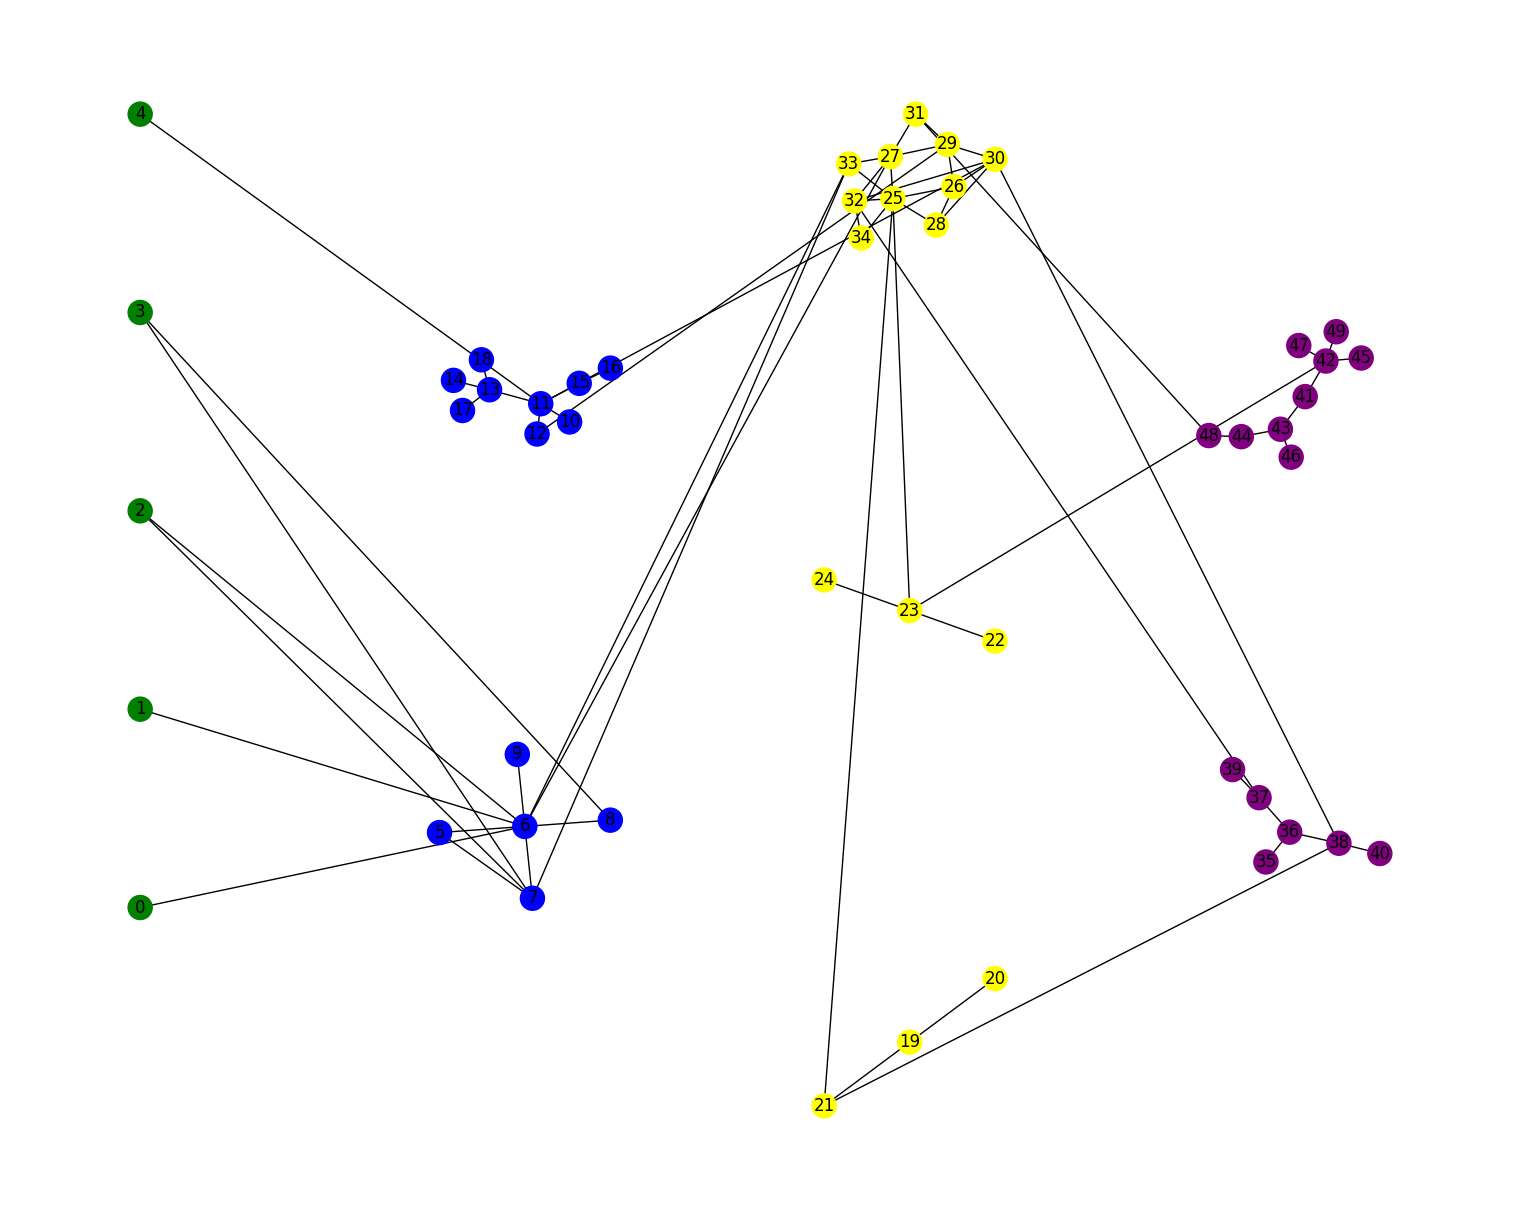

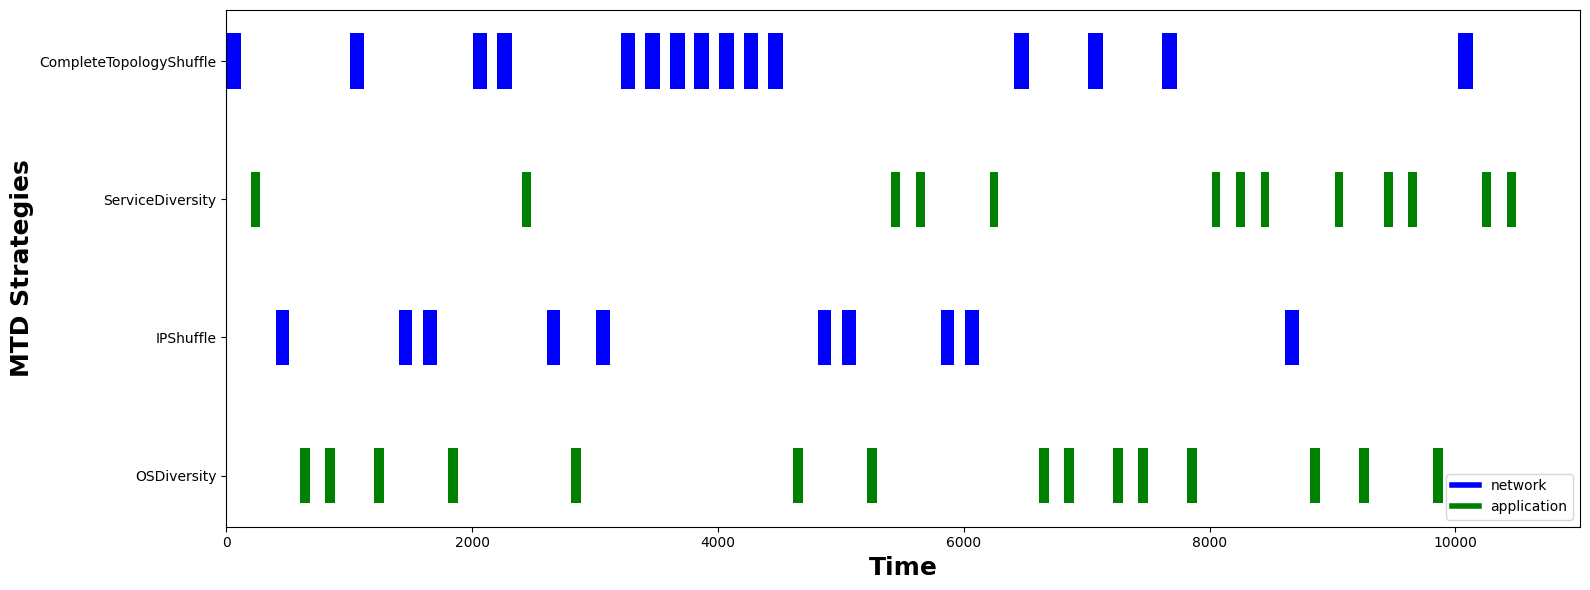

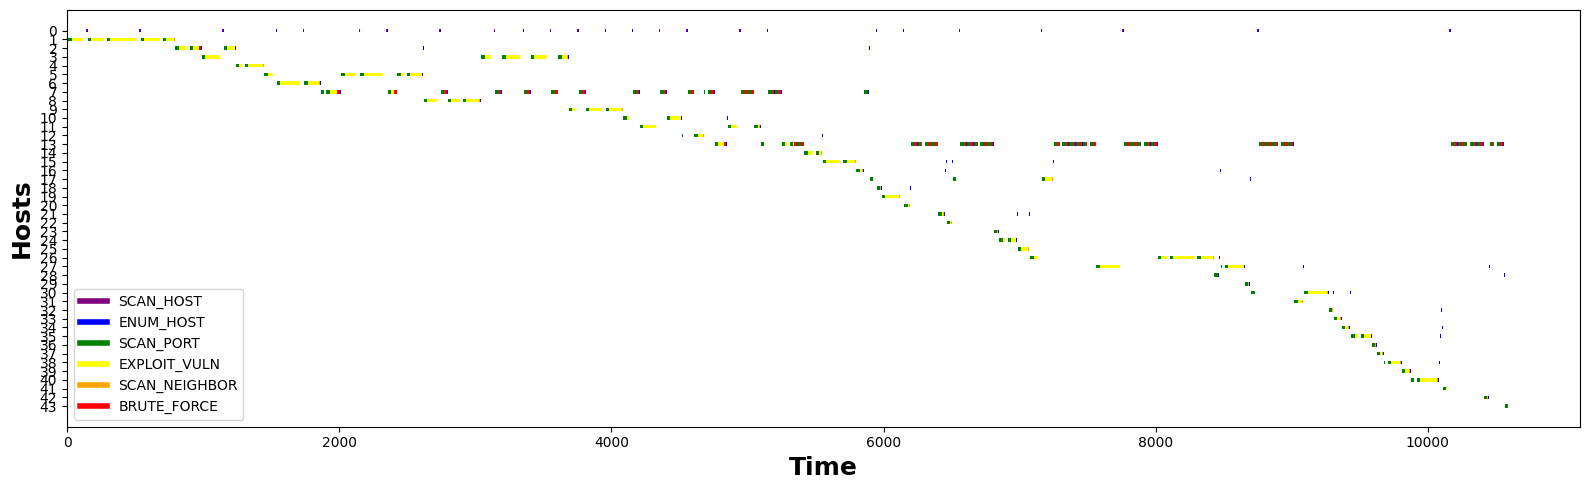

total compromised hosts:  41


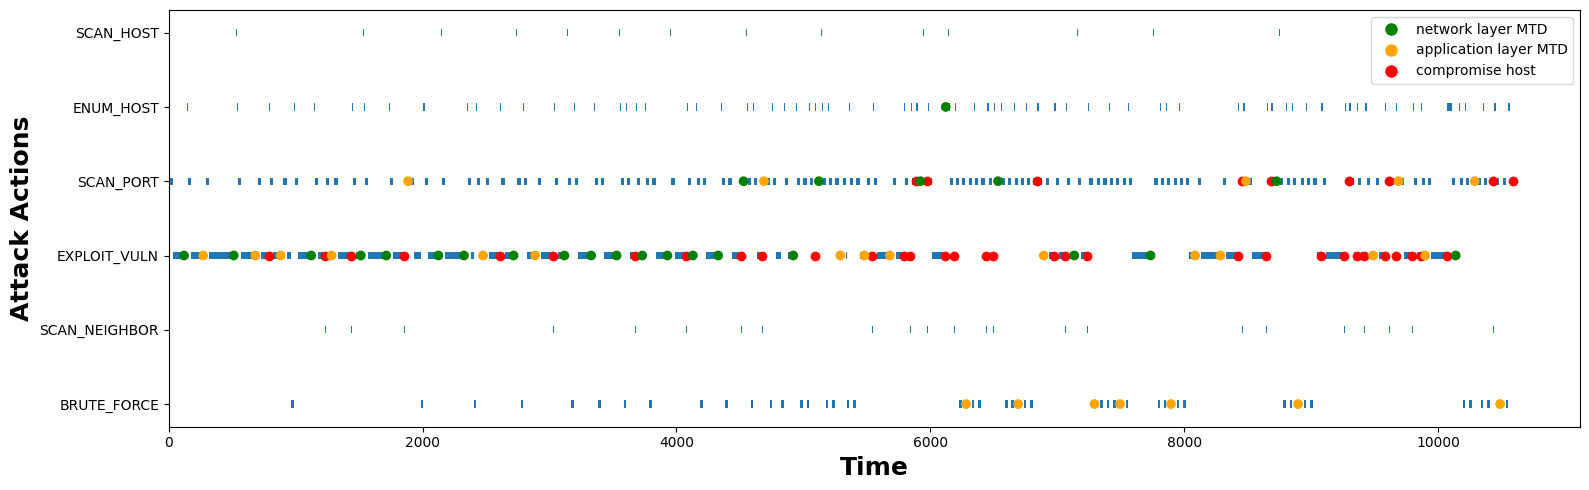

Action: 0
Action: 1
MTD: OSDiversity triggered 0.0s
Action: 1
MTD: IPShuffle triggered 200.0s
MTD: Interrupted EXPLOIT_VULN at 310.2s!
Action: 1
MTD: CompleteTopologyShuffle triggered 401.8s
MTD: Interrupted EXPLOIT_VULN at 522.2s!
Action: 1
MTD: CompleteTopologyShuffle triggered 602.2s
MTD: Interrupted EXPLOIT_VULN at 723.4s!
Action: 0
Action: 0
Action: 0
Action: 1
MTD: OSDiversity triggered 802.9s
Action: 1
MTD: IPShuffle triggered 1003.4s
MTD: Interrupted EXPLOIT_VULN at 1113.7s!
Action: 1
MTD: ServiceDiversity triggered 1203.9s
Action: 1
MTD: ServiceDiversity triggered 1404.4s
Action: 1
MTD: IPShuffle triggered 1604.6s
MTD: Interrupted EXPLOIT_VULN at 1714.9s!
Action: 1
MTD: ServiceDiversity triggered 1804.8s
Action: 1
MTD: IPShuffle triggered 2005.0s
MTD: Interrupted EXPLOIT_VULN at 2115.0s!
Action: 0
Action: 0
Action: 0
Action: 0
Action: 1
MTD: OSDiversity triggered 2205.4s
Action: 1
MTD: ServiceDiversity triggered 2405.5s
Action: 1
MTD: ServiceDiversity triggered 2605.7s
Action:

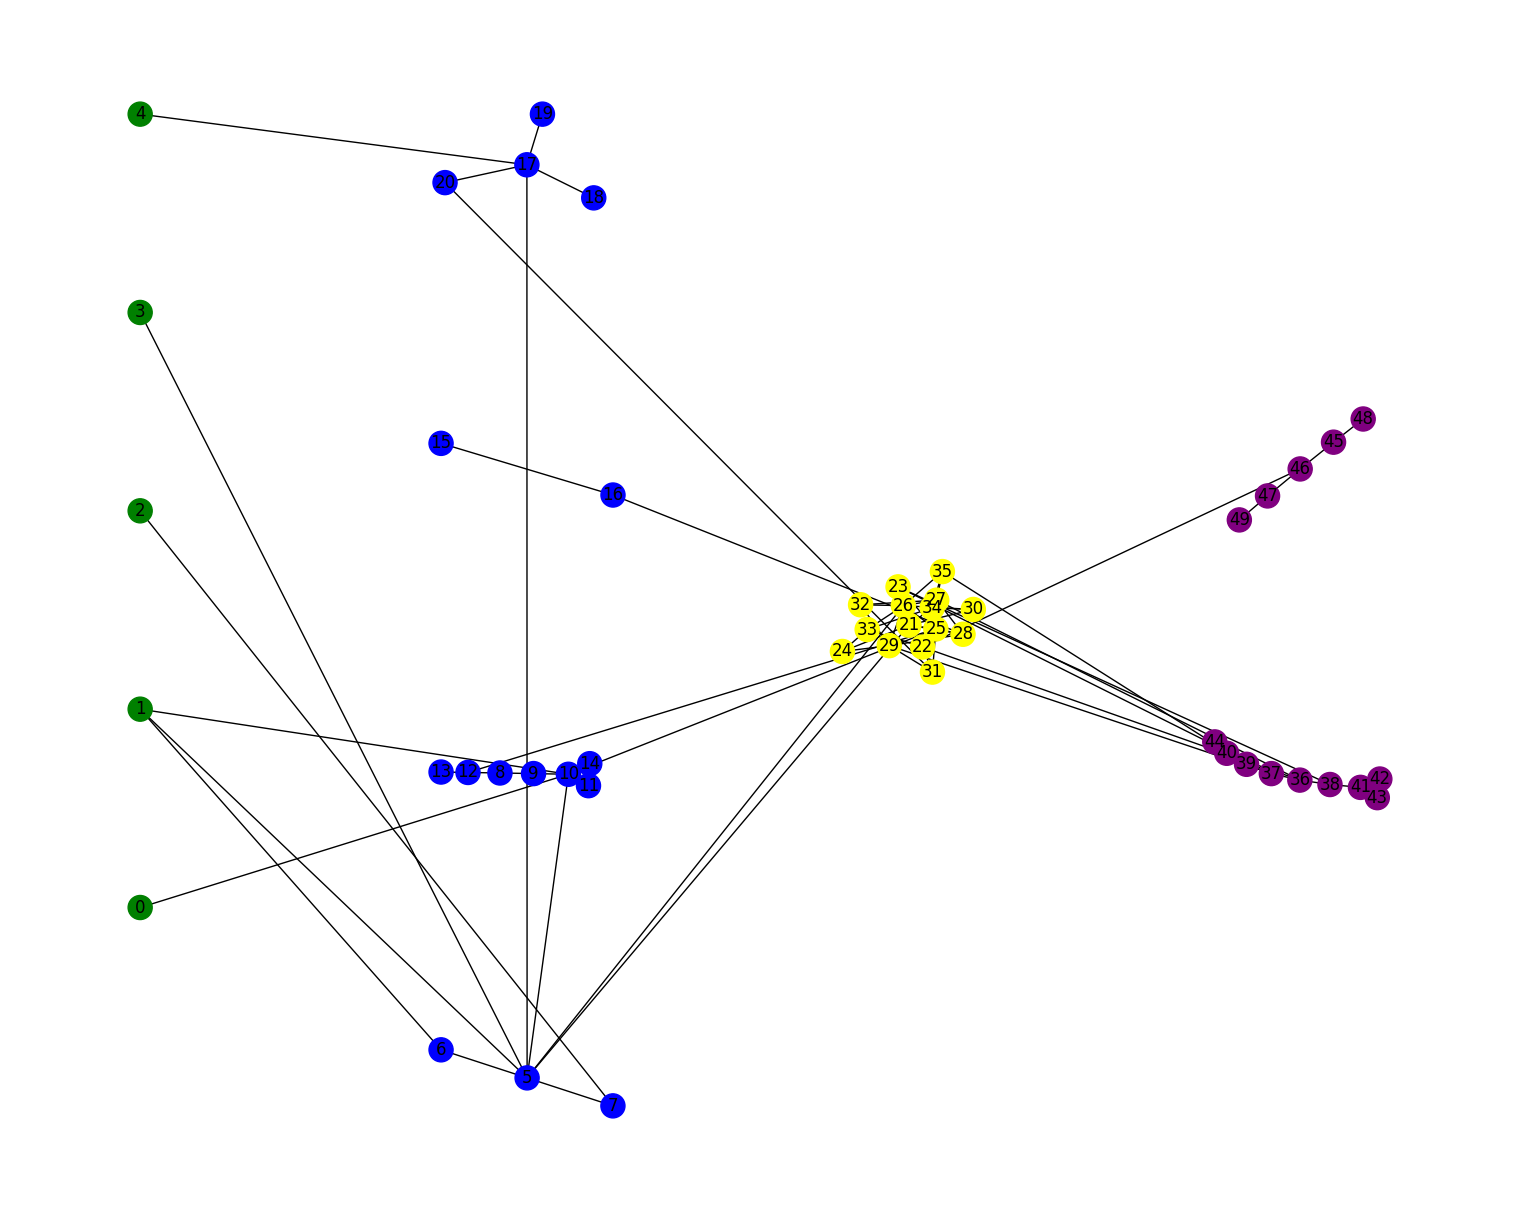

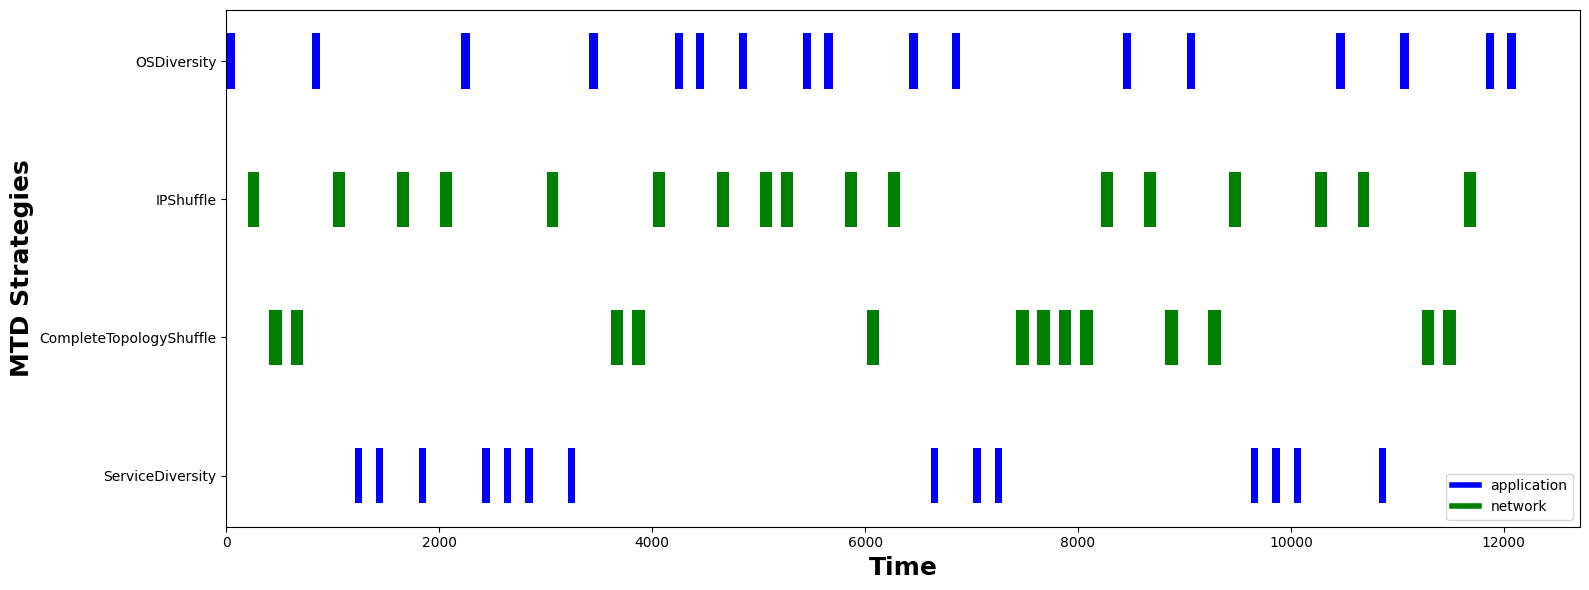

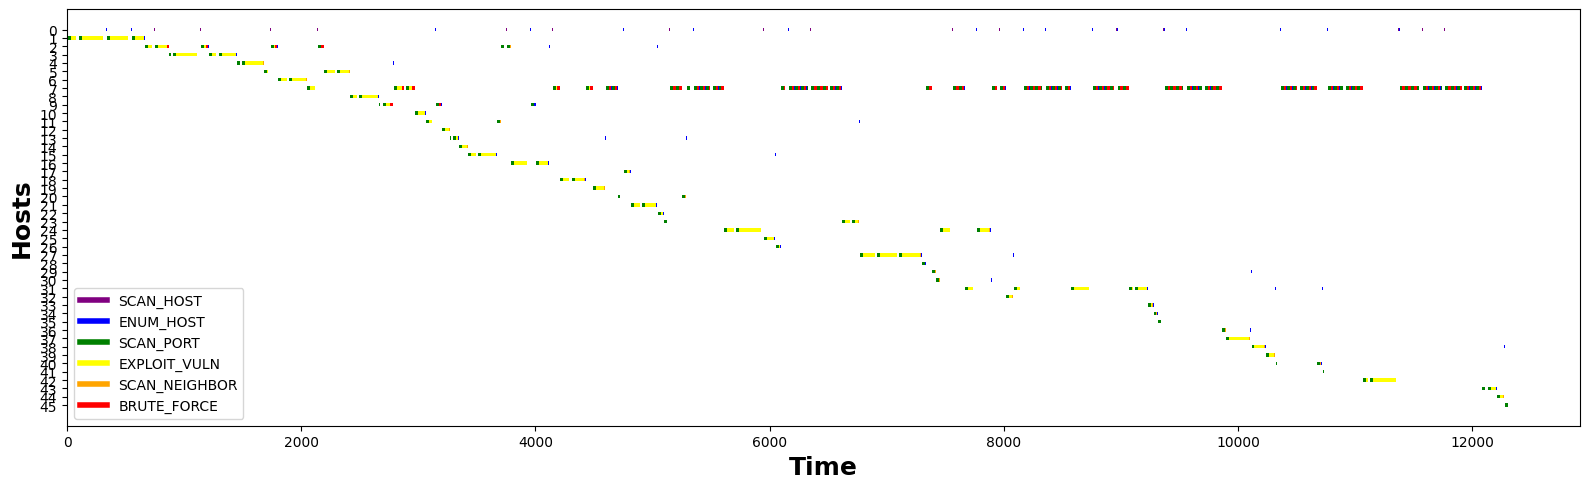

total compromised hosts:  41


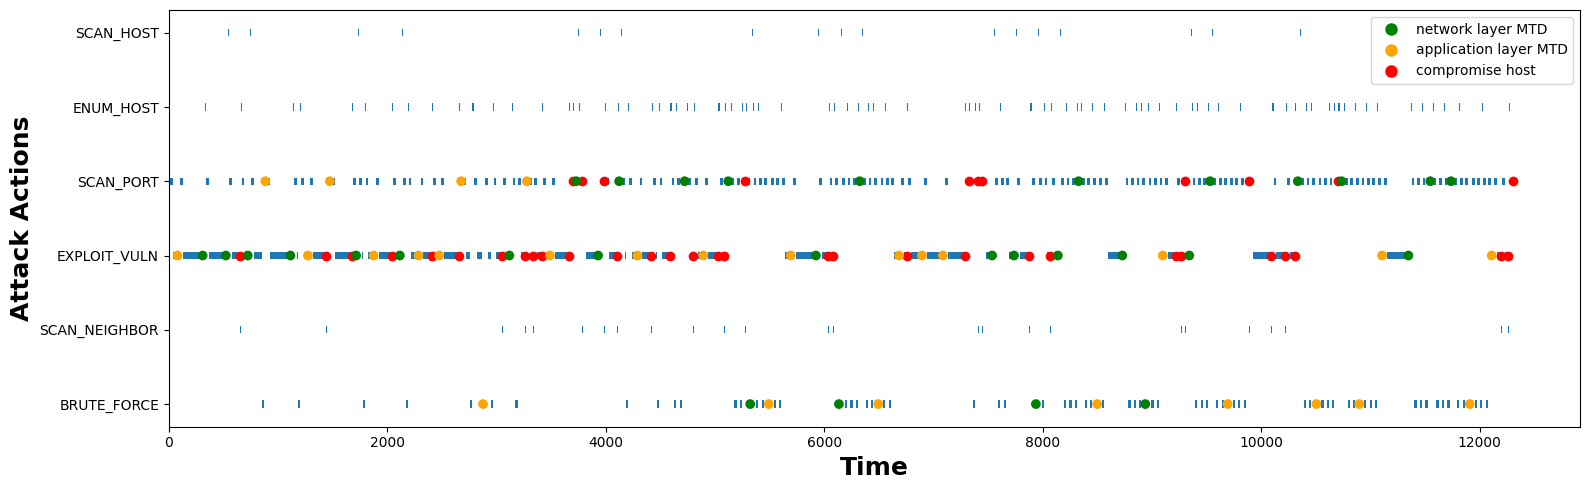

Action: 1
MTD: ServiceDiversity triggered 0.0s
Action: 1
MTD: OSDiversity triggered 200.3s
Action: 1
MTD: CompleteTopologyShuffle triggered 400.5s
MTD: Interrupted EXPLOIT_VULN at 520.5s!
Action: 1
MTD: IPShuffle triggered 600.9s
MTD: Interrupted EXPLOIT_VULN at 711.1s!
Action: 0
Action: 0
Action: 0
Action: 1
MTD: OSDiversity triggered 802.3s
Action: 1
MTD: ServiceDiversity triggered 1002.3s
Action: 1
MTD: IPShuffle triggered 1202.6s
MTD: Interrupted EXPLOIT_VULN at 1312.7s!
Action: 0
Action: 1
MTD: ServiceDiversity triggered 1402.9s
Action: 1
MTD: CompleteTopologyShuffle triggered 1603.5s
MTD: Interrupted BRUTE_FORCE at 1724.4s!
Action: 0
Action: 1
MTD: IPShuffle triggered 1803.9s
MTD: Interrupted EXPLOIT_VULN at 1914.7s!
Action: 1
MTD: ServiceDiversity triggered 2004.1s
Action: 1
MTD: IPShuffle triggered 2204.2s
MTD: Interrupted EXPLOIT_VULN at 2314.4s!
Action: 0
Action: 1
MTD: OSDiversity triggered 2404.4s
Action: 1
MTD: OSDiversity triggered 2604.8s
Action: 1
MTD: IPShuffle trigger

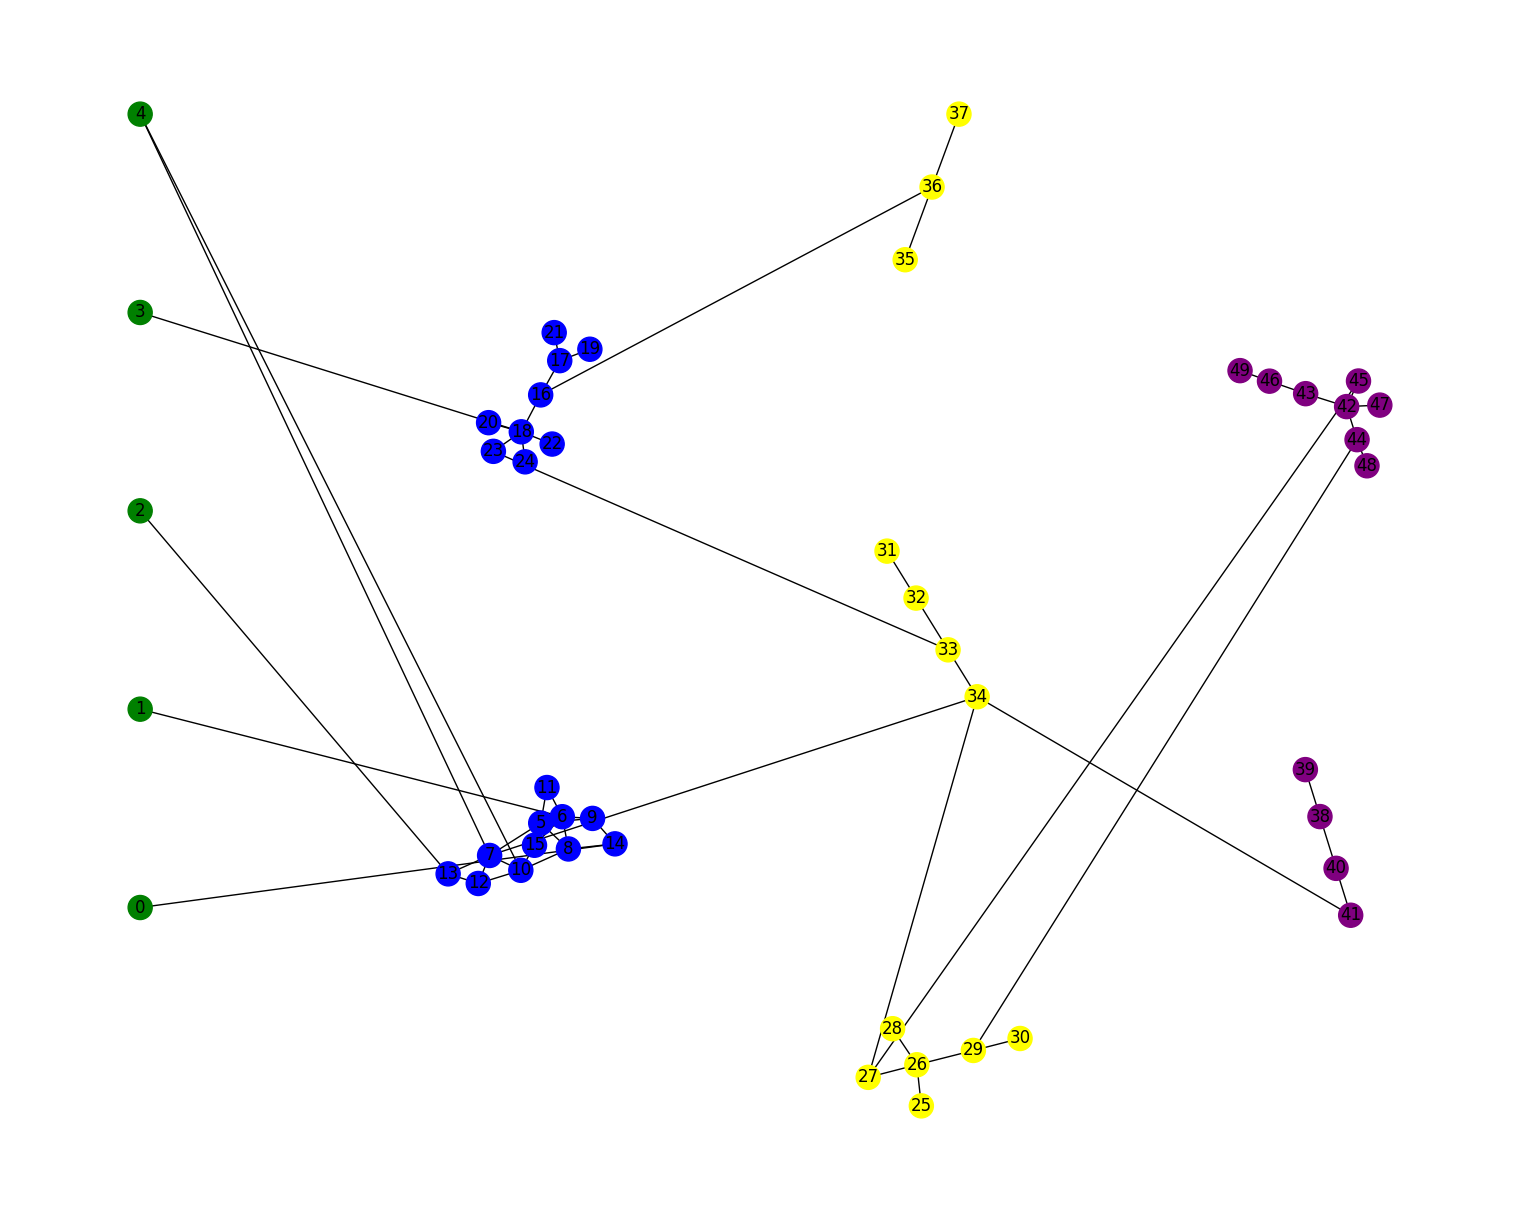

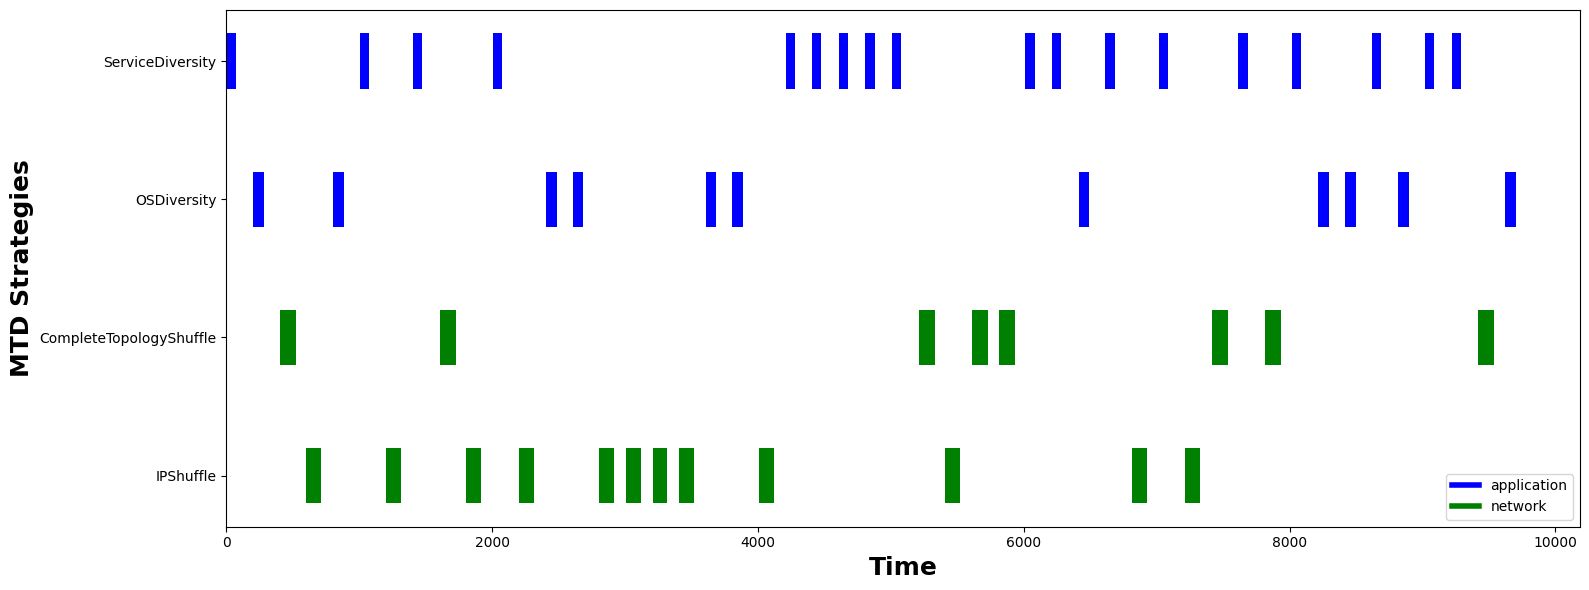

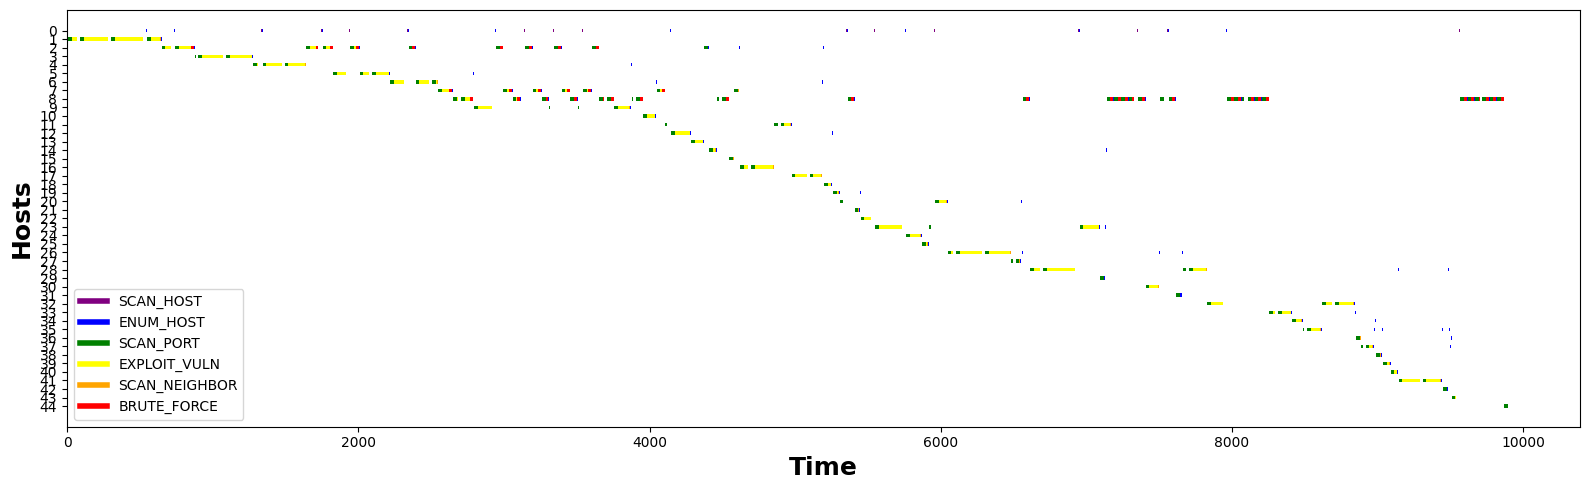

total compromised hosts:  41


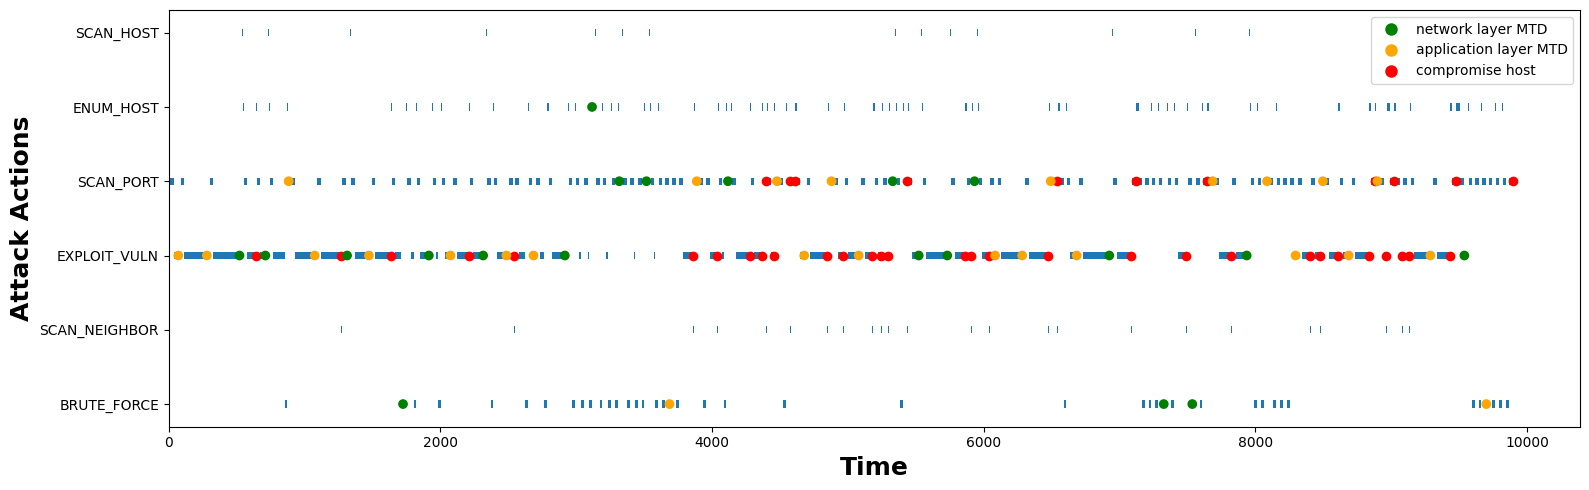

Action: 1
MTD: OSDiversity triggered 0.0s
Action: 1
MTD: IPShuffle triggered 200.0s
MTD: Interrupted EXPLOIT_VULN at 310.4s!
Action: 1
MTD: ServiceDiversity triggered 400.5s
Action: 1
MTD: OSDiversity triggered 600.8s
Action: 1
MTD: IPShuffle triggered 802.0s
MTD: Interrupted EXPLOIT_VULN at 912.6s!
Action: 1
MTD: IPShuffle triggered 1002.3s
MTD: Interrupted EXPLOIT_VULN at 1112.6s!
Action: 0
Action: 1
MTD: IPShuffle triggered 1202.4s
MTD: Interrupted EXPLOIT_VULN at 1313.9s!
Action: 0
Action: 0
Action: 1
MTD: ServiceDiversity triggered 1402.9s
Action: 1
MTD: CompleteTopologyShuffle triggered 1603.2s
MTD: Interrupted SCAN_PORT at 1723.4s!
Action: 0
Action: 0
Action: 0
Action: 1
MTD: ServiceDiversity triggered 1803.4s
Action: 1
MTD: IPShuffle triggered 2003.6s
MTD: Interrupted EXPLOIT_VULN at 2113.7s!
Action: 0
Action: 0
Action: 1
MTD: ServiceDiversity triggered 2204.8s
Action: 1
MTD: OSDiversity triggered 2405.7s
Action: 1
MTD: ServiceDiversity triggered 2605.9s
Action: 1
MTD: Complete

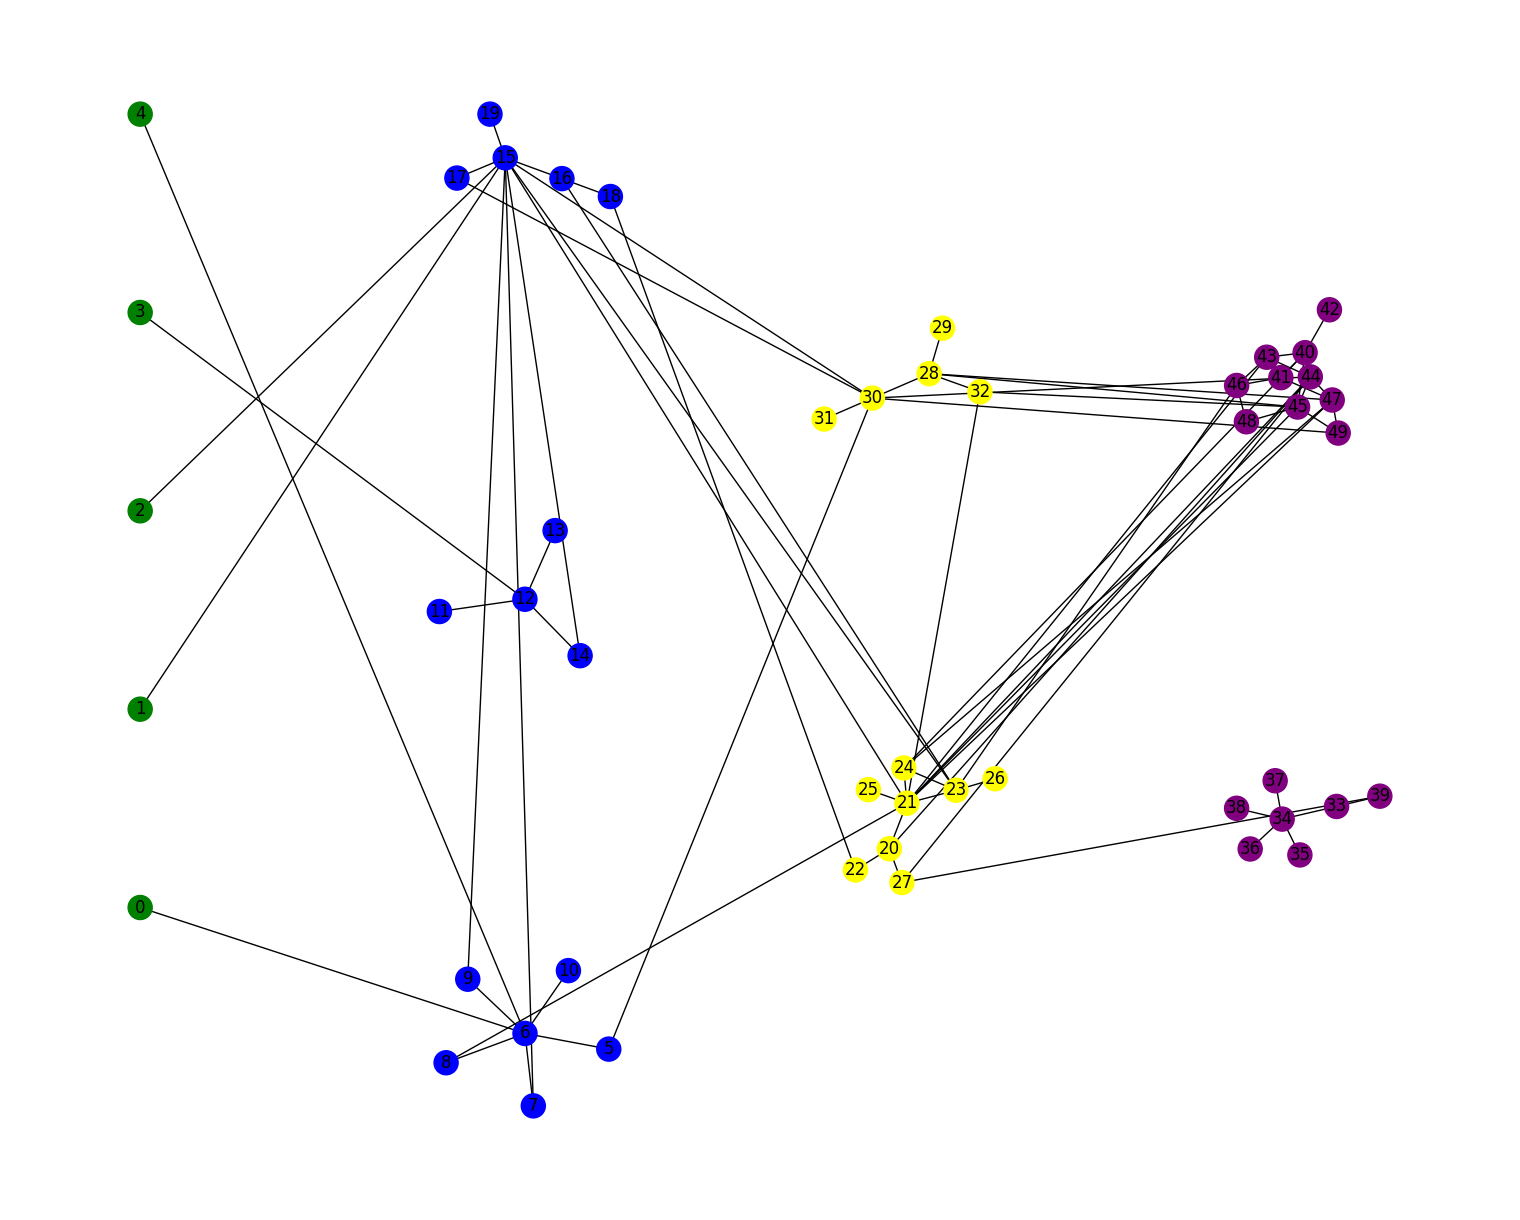

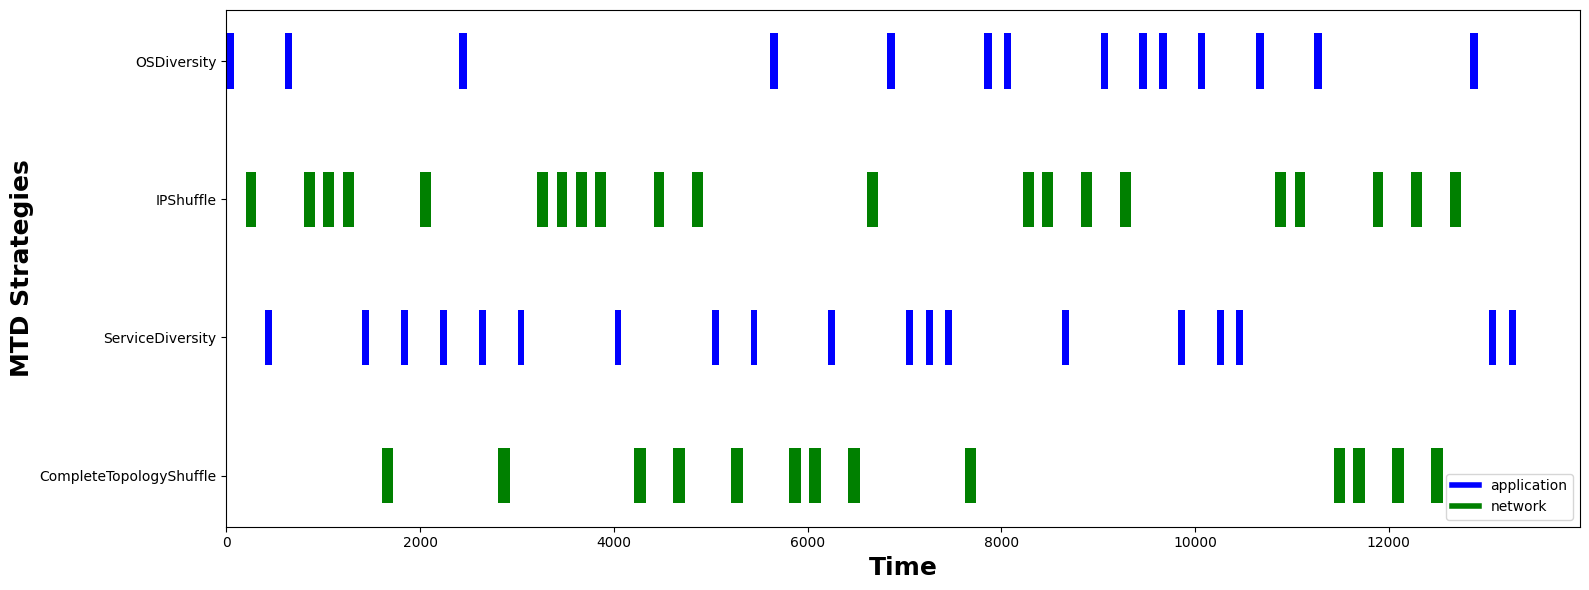

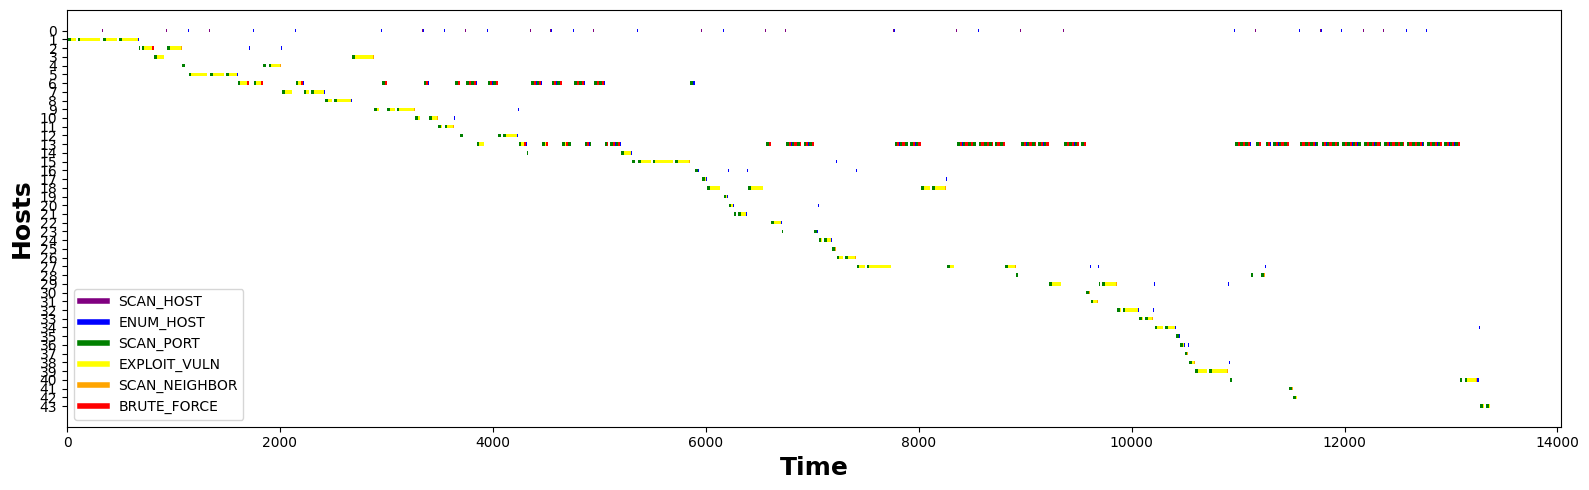

total compromised hosts:  41


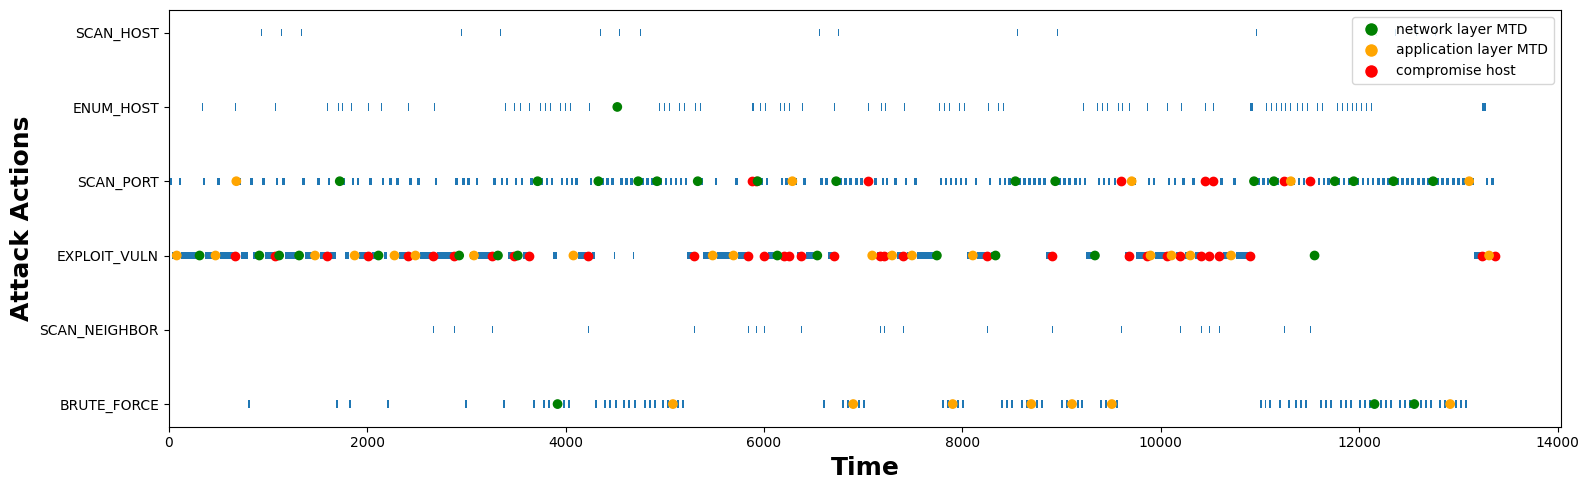

Action: 1
MTD: ServiceDiversity triggered 0.0s
Action: 1
MTD: OSDiversity triggered 200.3s
Action: 1
MTD: ServiceDiversity triggered 400.4s
Action: 1
MTD: OSDiversity triggered 602.1s
Action: 1
MTD: CompleteTopologyShuffle triggered 802.2s
MTD: Interrupted EXPLOIT_VULN at 922.2s!
Action: 1
MTD: CompleteTopologyShuffle triggered 1003.2s
MTD: Interrupted EXPLOIT_VULN at 1123.4s!
Action: 0
Action: 1
MTD: IPShuffle triggered 1203.3s
MTD: Interrupted EXPLOIT_VULN at 1313.4s!
Action: 1
MTD: ServiceDiversity triggered 1403.5s
Action: 1
MTD: ServiceDiversity triggered 1603.8s
Action: 1
MTD: CompleteTopologyShuffle triggered 1806.8s
MTD: Interrupted EXPLOIT_VULN at 1927.0s!
Action: 0
Action: 1
MTD: CompleteTopologyShuffle triggered 2007.1s
MTD: Interrupted EXPLOIT_VULN at 2128.0s!
Action: 0
Action: 0
Action: 1
MTD: IPShuffle triggered 2207.1s
MTD: Interrupted SCAN_NEIGHBOR at 2317.2s!
Action: 1
MTD: CompleteTopologyShuffle triggered 2408.4s
MTD: Interrupted BRUTE_FORCE at 2529.0s!
Action: 0
Act

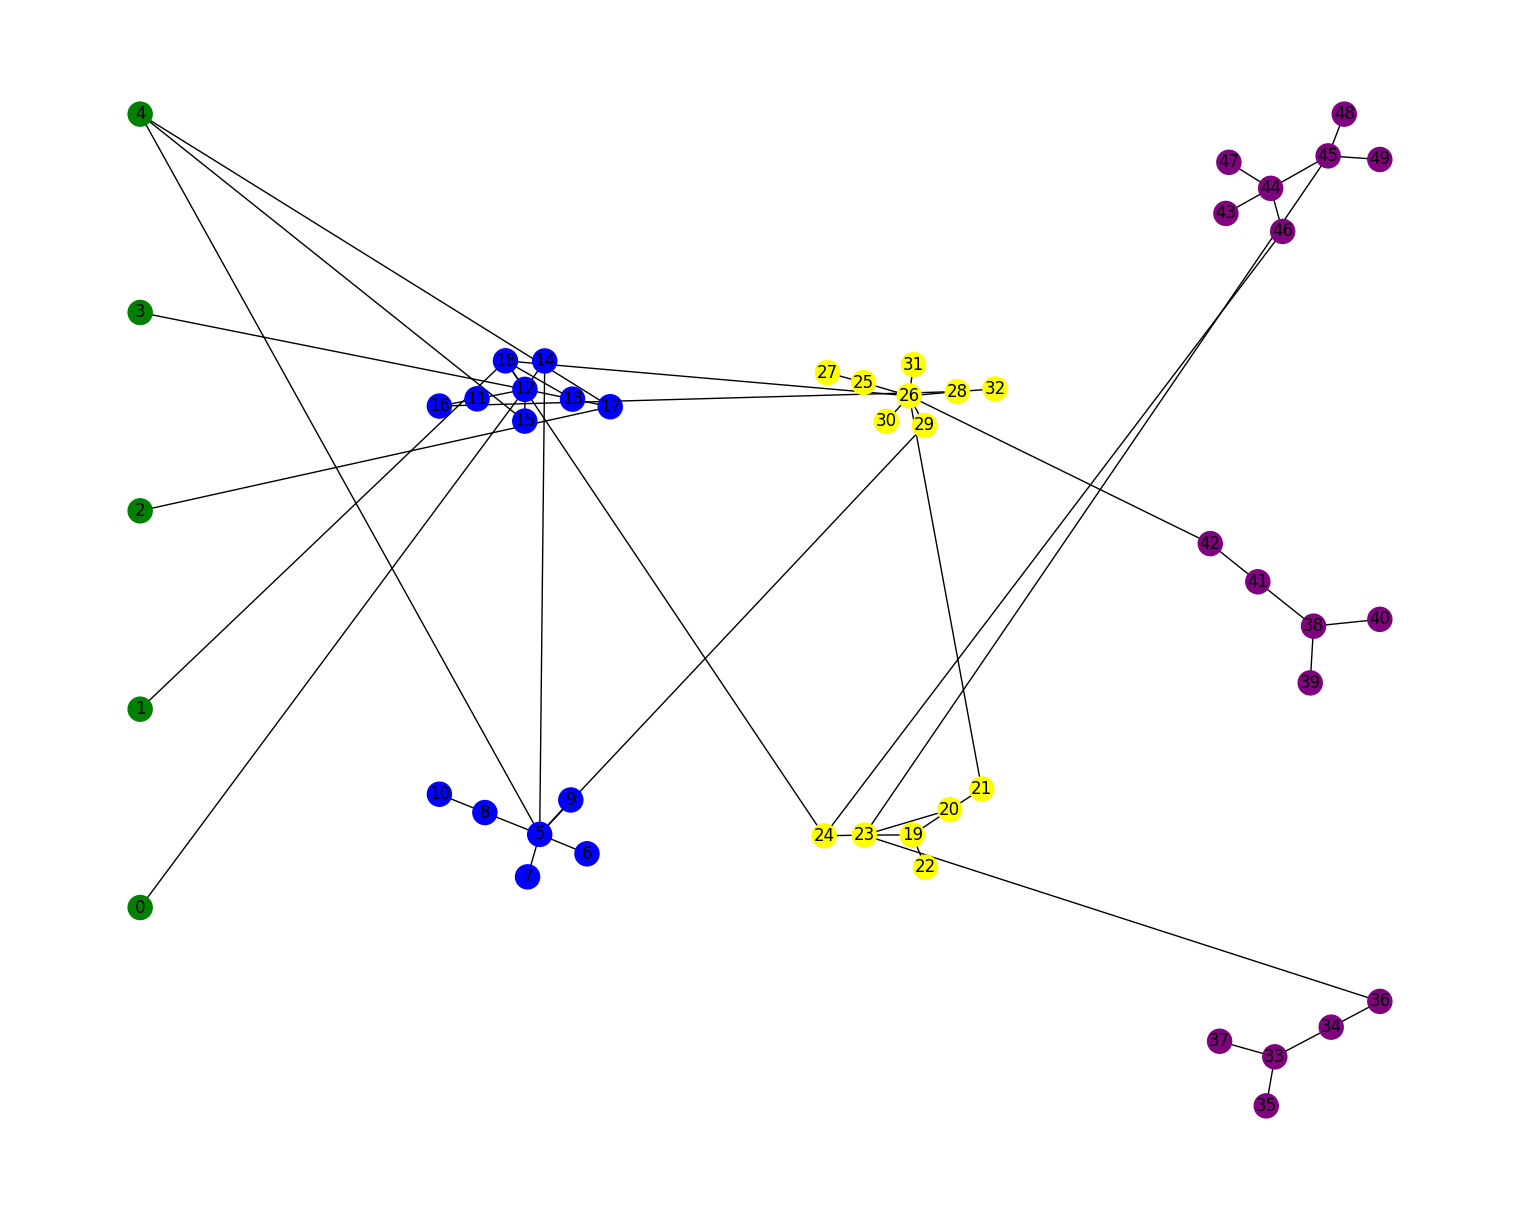

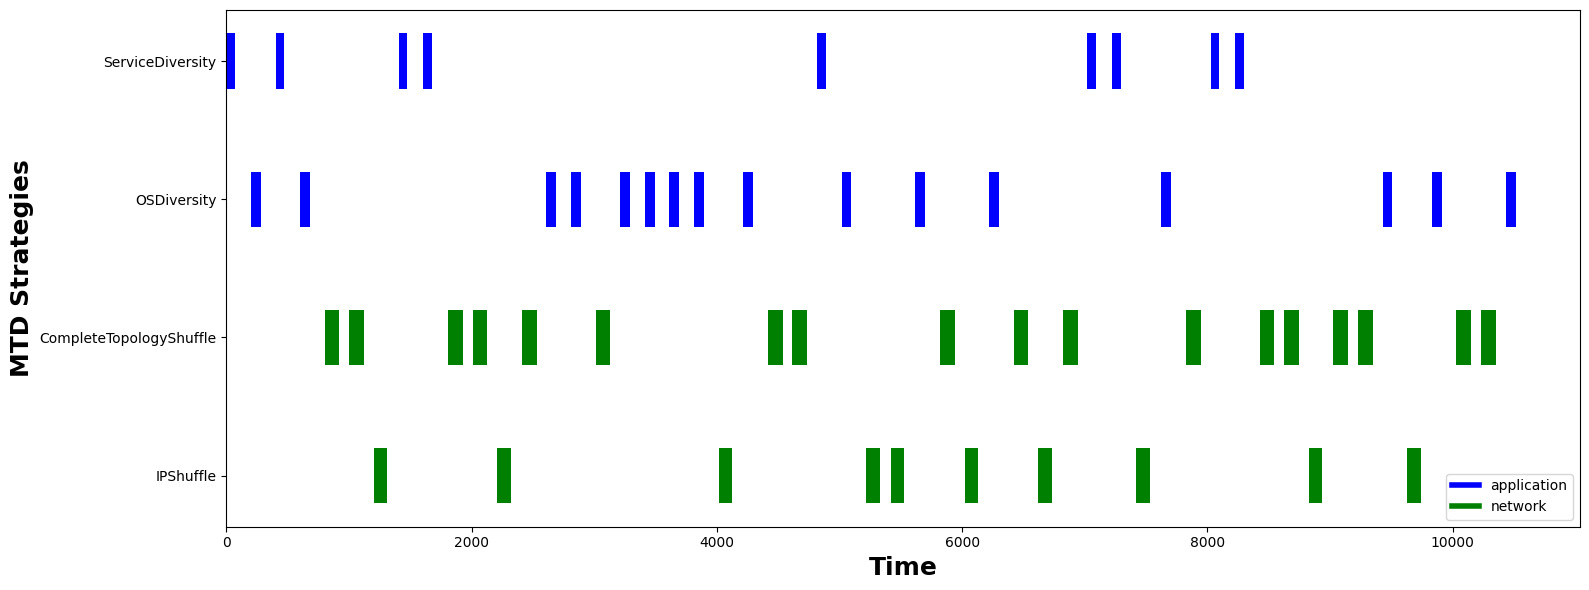

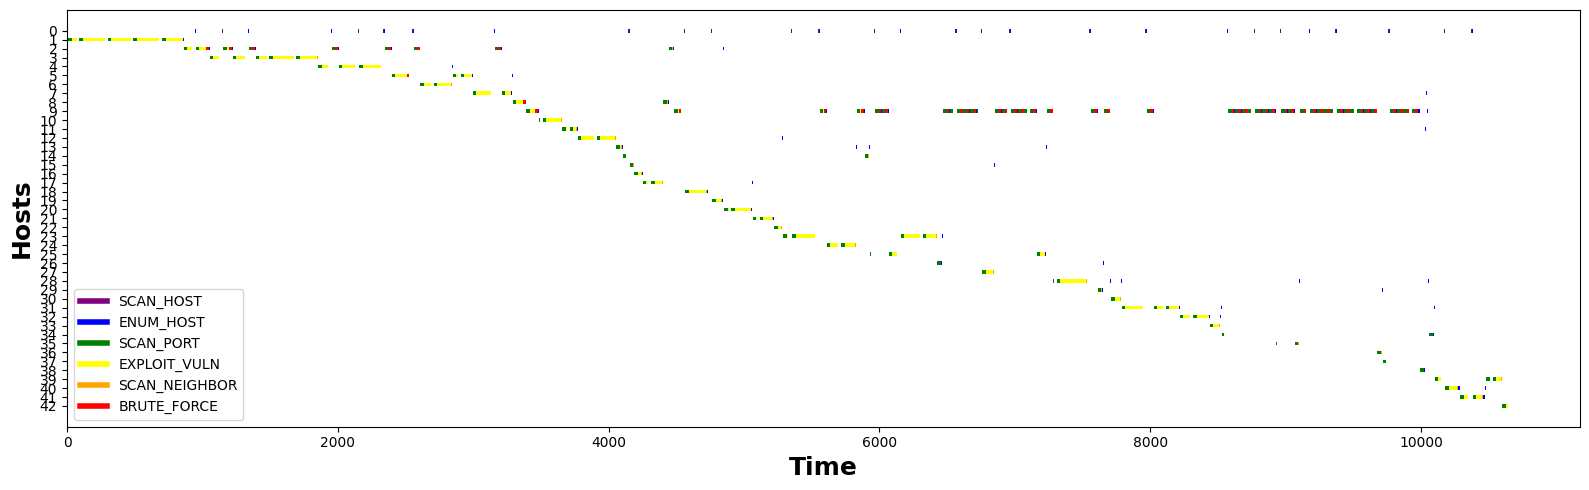

total compromised hosts:  41


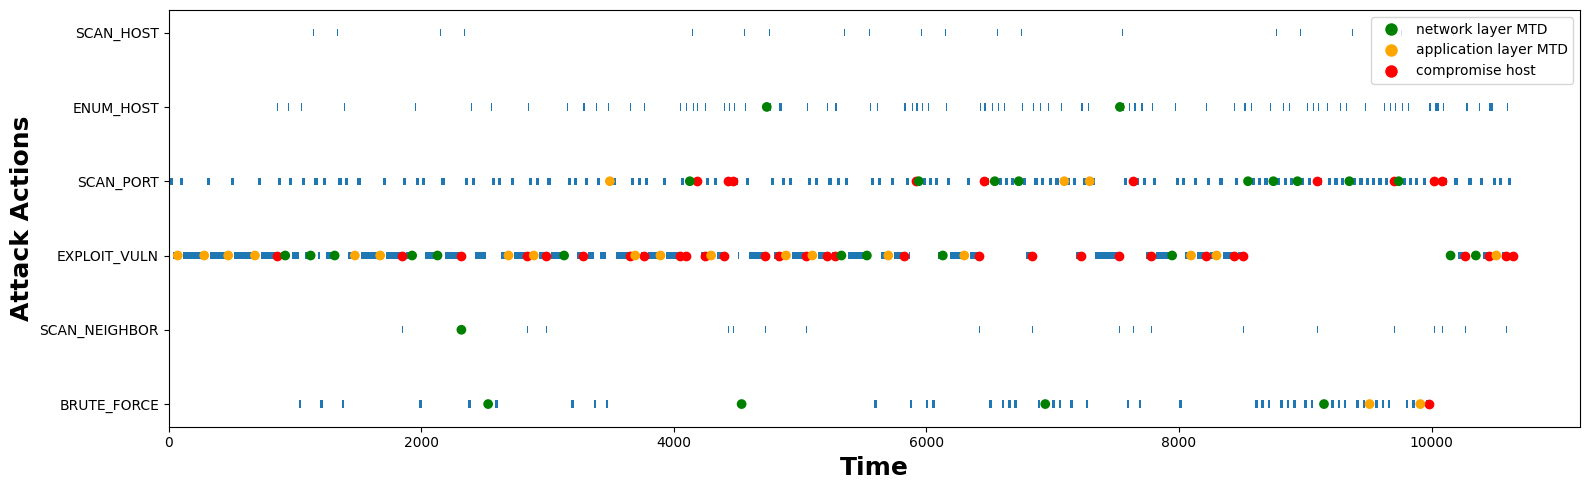

Action: 0
Action: 0
Action: 0
Action: 1
MTD: IPShuffle triggered 0.0s
MTD: Interrupted EXPLOIT_VULN at 110.5s!
Action: 1
MTD: CompleteTopologyShuffle triggered 200.1s
MTD: Interrupted EXPLOIT_VULN at 320.3s!
Action: 1
MTD: OSDiversity triggered 400.9s
Action: 1
MTD: ServiceDiversity triggered 601.0s
Action: 1
MTD: OSDiversity triggered 801.0s
Action: 1
MTD: OSDiversity triggered 1001.1s
Action: 1
MTD: OSDiversity triggered 1202.1s
Action: 1
MTD: CompleteTopologyShuffle triggered 1402.1s
MTD: Interrupted EXPLOIT_VULN at 1522.1s!
Action: 0
Action: 1
MTD: IPShuffle triggered 1602.3s
MTD: Interrupted EXPLOIT_VULN at 1712.6s!
Action: 1
MTD: IPShuffle triggered 1802.4s
MTD: Interrupted EXPLOIT_VULN at 1913.3s!
Action: 1
MTD: ServiceDiversity triggered 2002.6s
Action: 1
MTD: CompleteTopologyShuffle triggered 2202.6s
MTD: Interrupted EXPLOIT_VULN at 2322.8s!
Action: 1
MTD: ServiceDiversity triggered 2402.8s
Action: 1
MTD: CompleteTopologyShuffle triggered 2603.0s
MTD: Interrupted EXPLOIT_VULN 

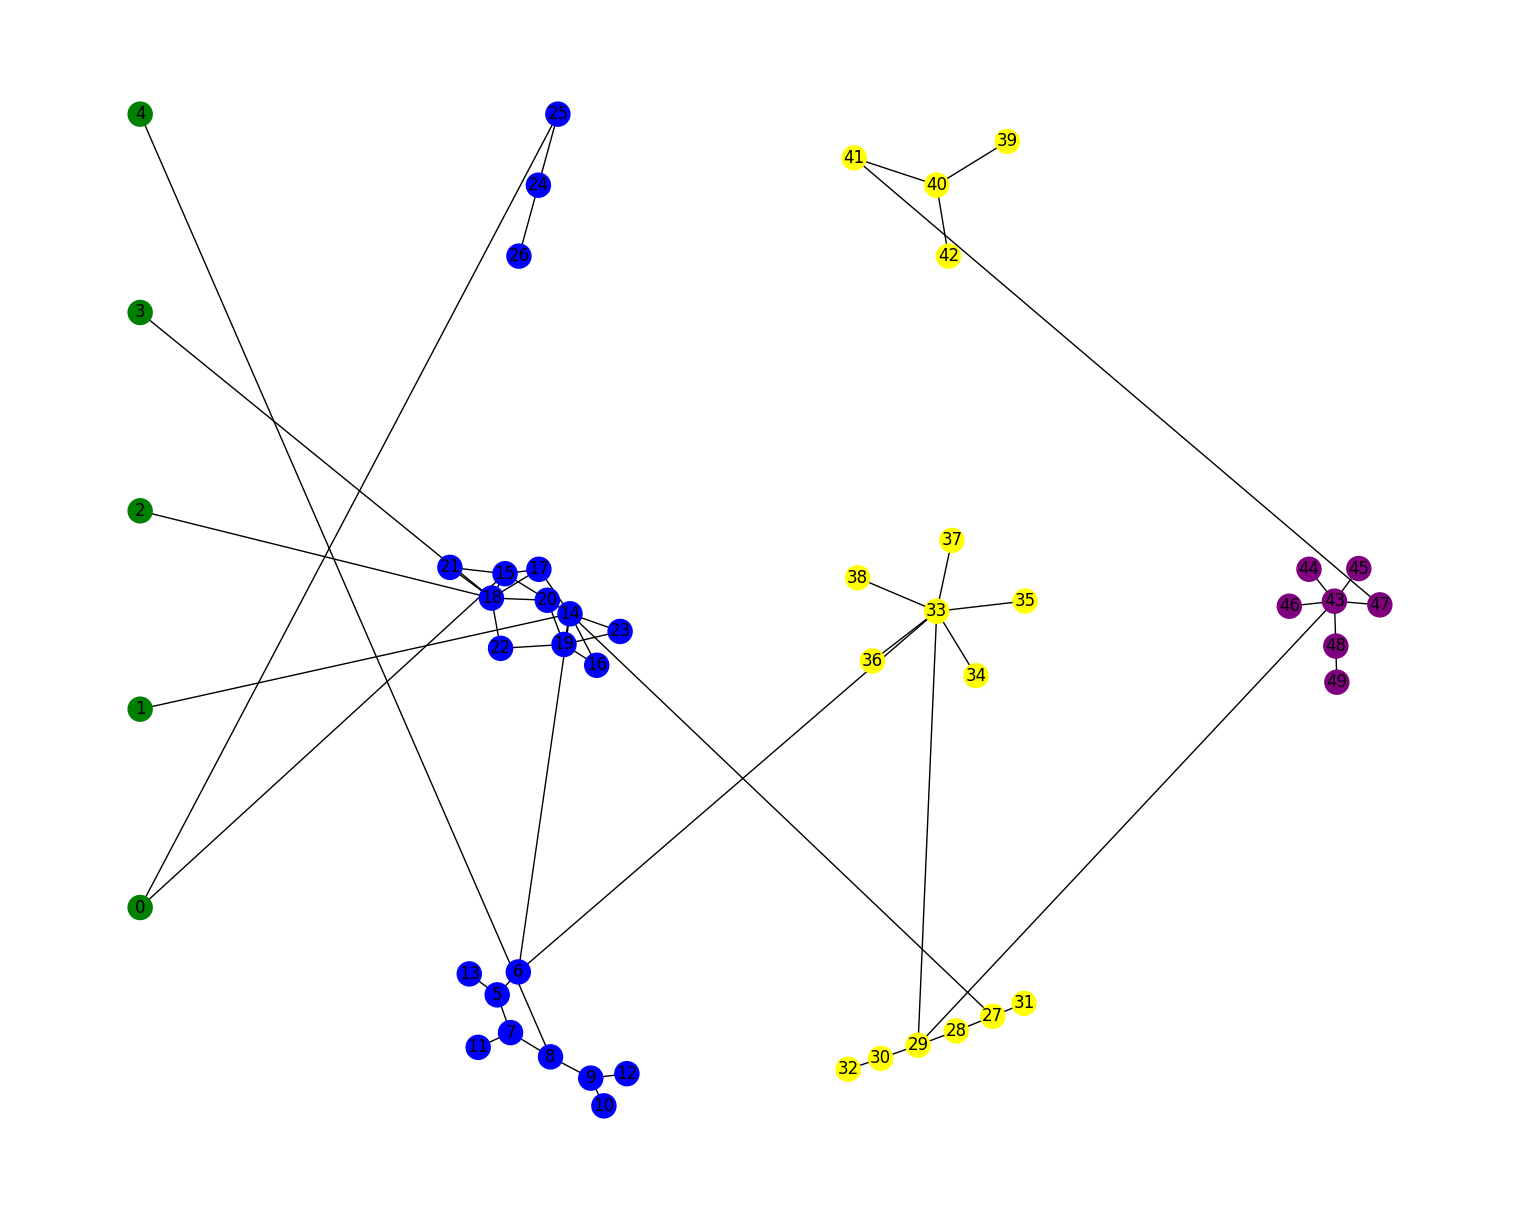

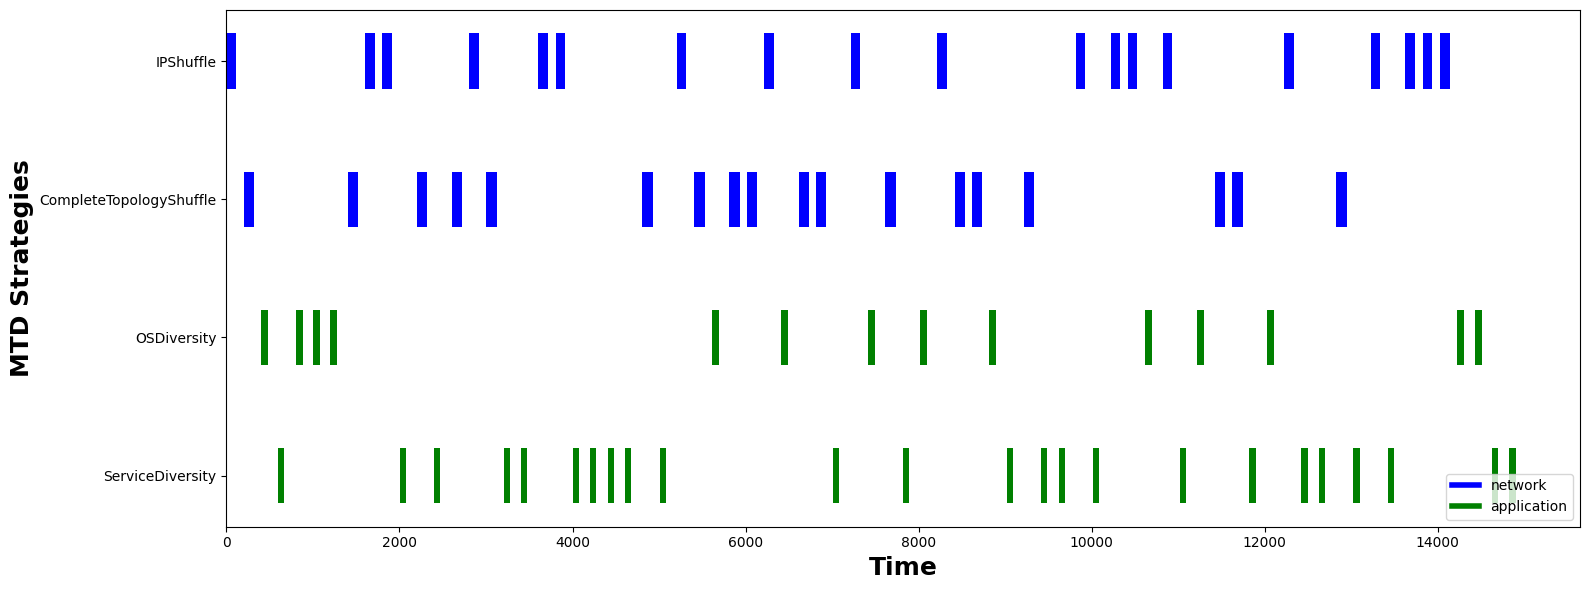

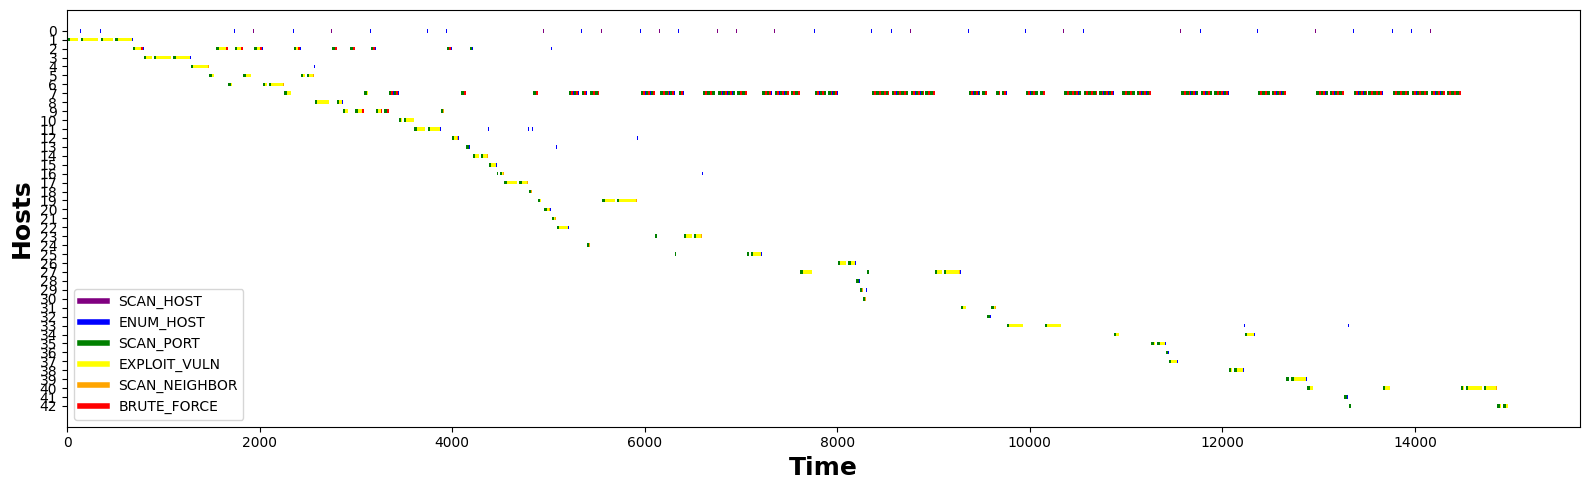

total compromised hosts:  41


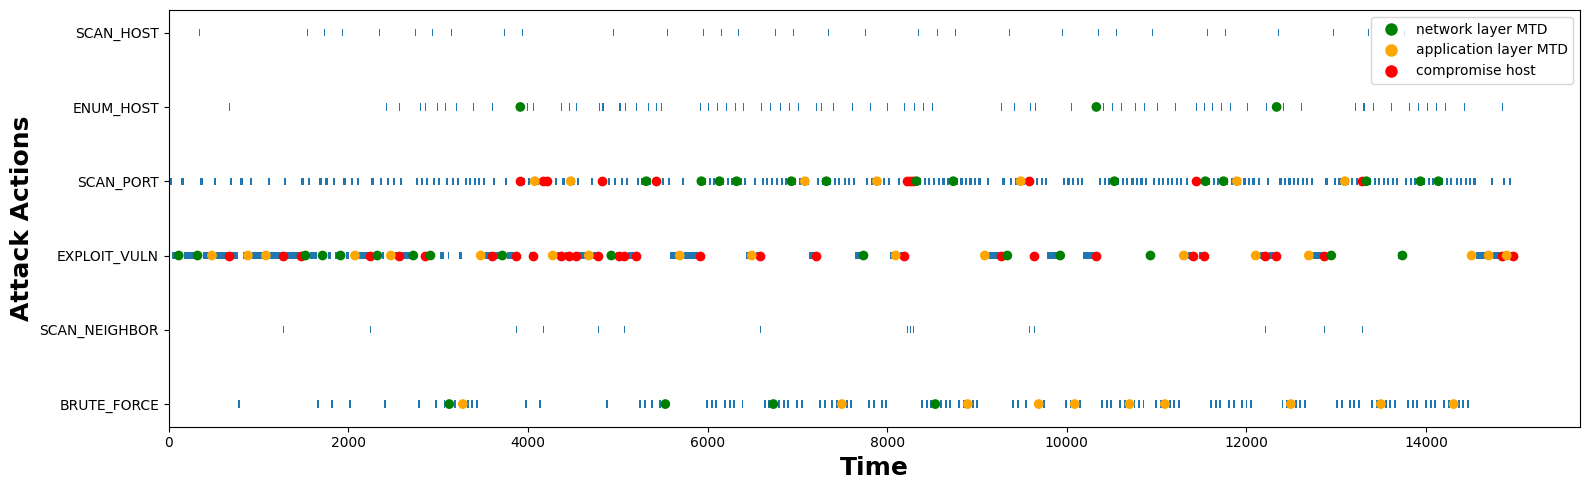

Action: 0
Action: 0
Action: 1
MTD: IPShuffle triggered 0.0s
MTD: Interrupted EXPLOIT_VULN at 110.2s!
Action: 1
MTD: ServiceDiversity triggered 200.1s
Action: 1
MTD: CompleteTopologyShuffle triggered 400.7s
MTD: Interrupted EXPLOIT_VULN at 521.7s!
Action: 0
Action: 0
Action: 1
MTD: CompleteTopologyShuffle triggered 600.8s
MTD: Interrupted EXPLOIT_VULN at 721.8s!
Action: 0
Action: 1
MTD: IPShuffle triggered 800.8s
MTD: Interrupted EXPLOIT_VULN at 911.5s!
Action: 1
MTD: CompleteTopologyShuffle triggered 1001.0s
MTD: Interrupted EXPLOIT_VULN at 1121.2s!
Action: 0
Action: 1
MTD: OSDiversity triggered 1201.1s
Action: 1
MTD: IPShuffle triggered 1401.3s
MTD: Interrupted EXPLOIT_VULN at 1513.0s!
Action: 1
MTD: CompleteTopologyShuffle triggered 1602.0s
MTD: Interrupted EXPLOIT_VULN at 1722.6s!
Action: 0
Action: 0
Action: 1
MTD: ServiceDiversity triggered 1802.8s
Action: 1
MTD: ServiceDiversity triggered 2003.0s
Action: 1
MTD: OSDiversity triggered 2203.1s
Action: 1
MTD: OSDiversity triggered 240

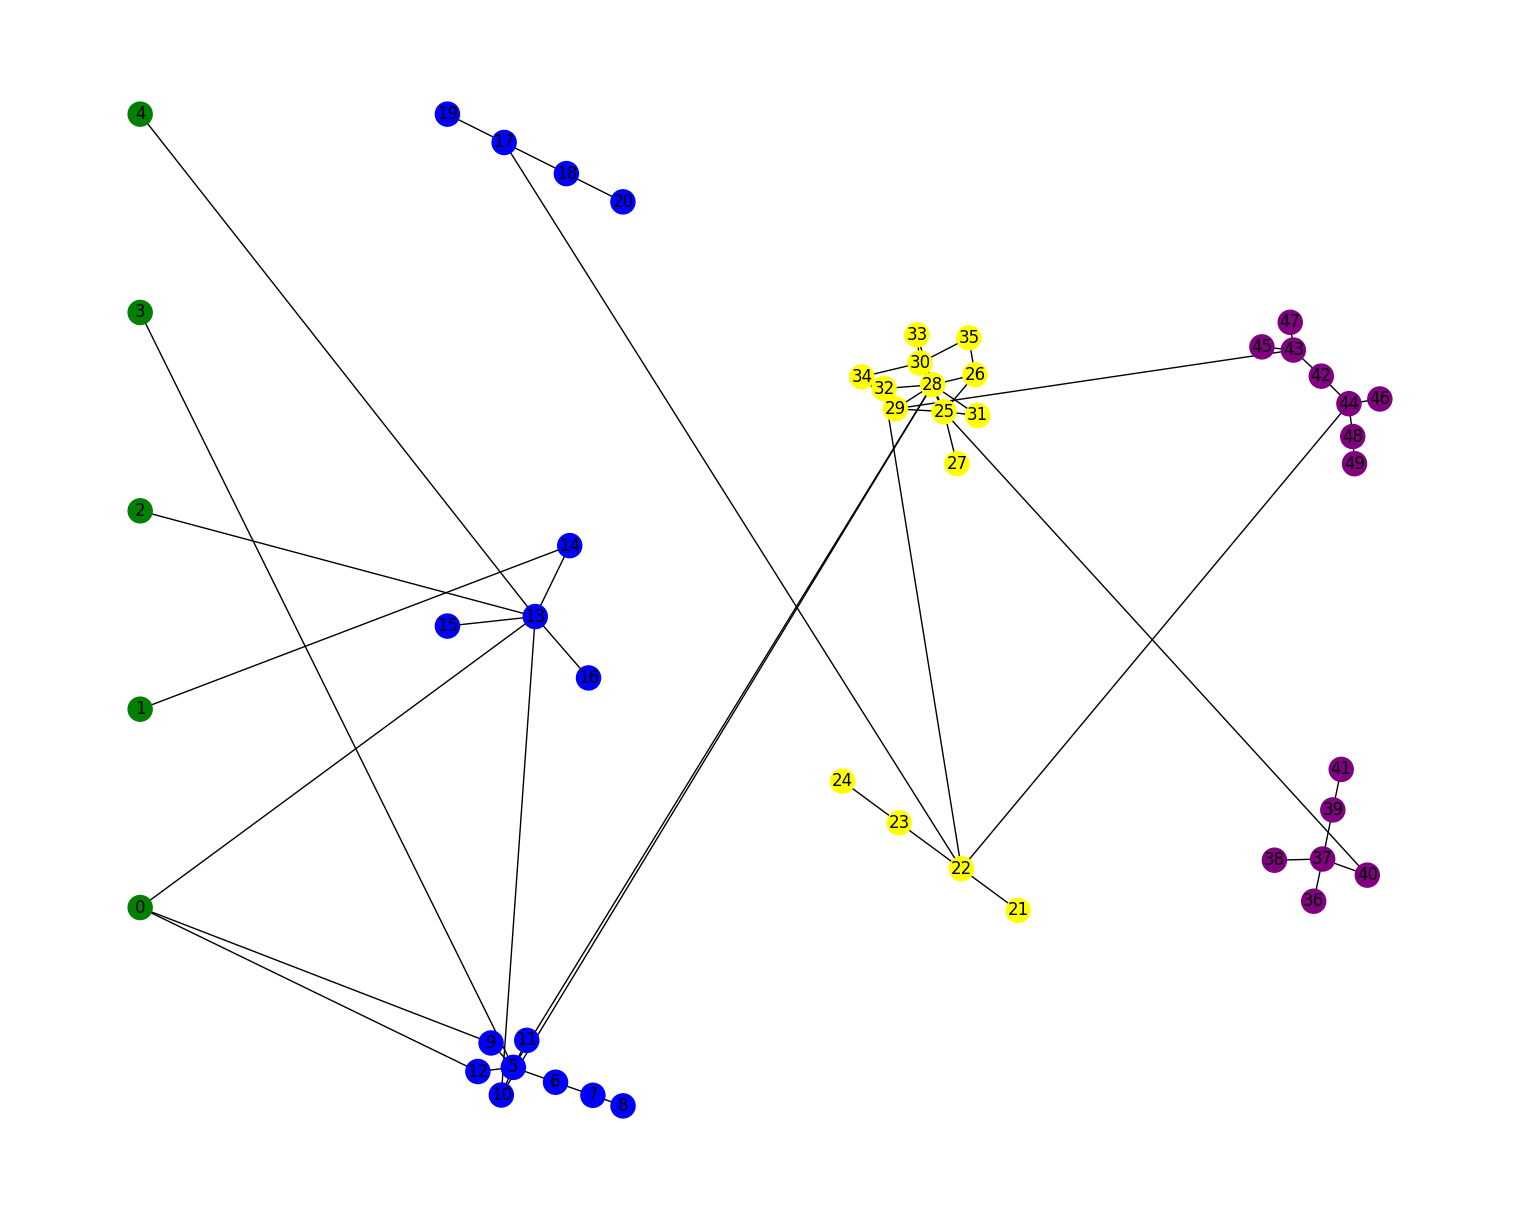

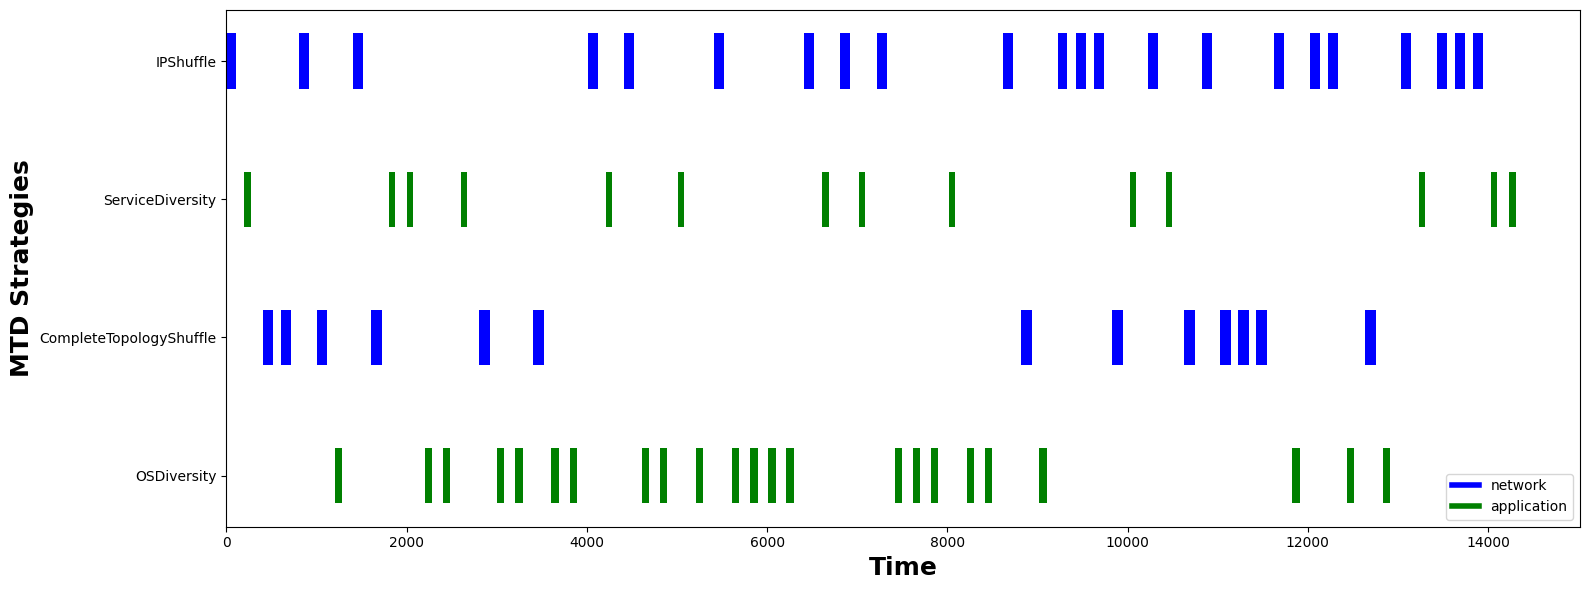

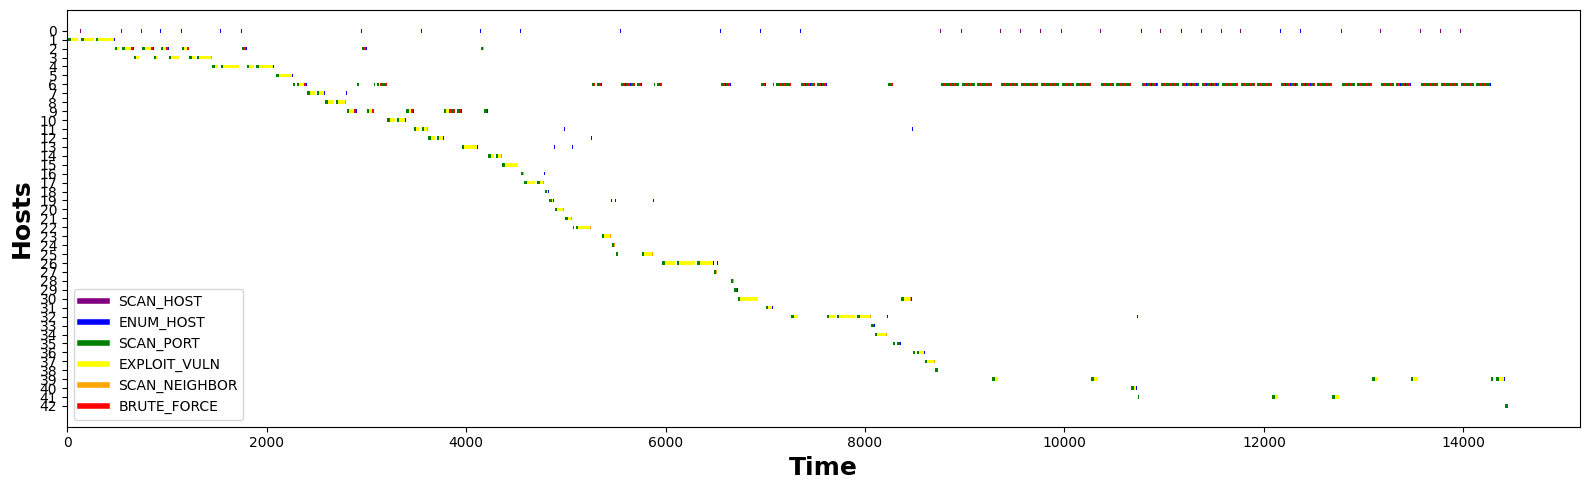

total compromised hosts:  41


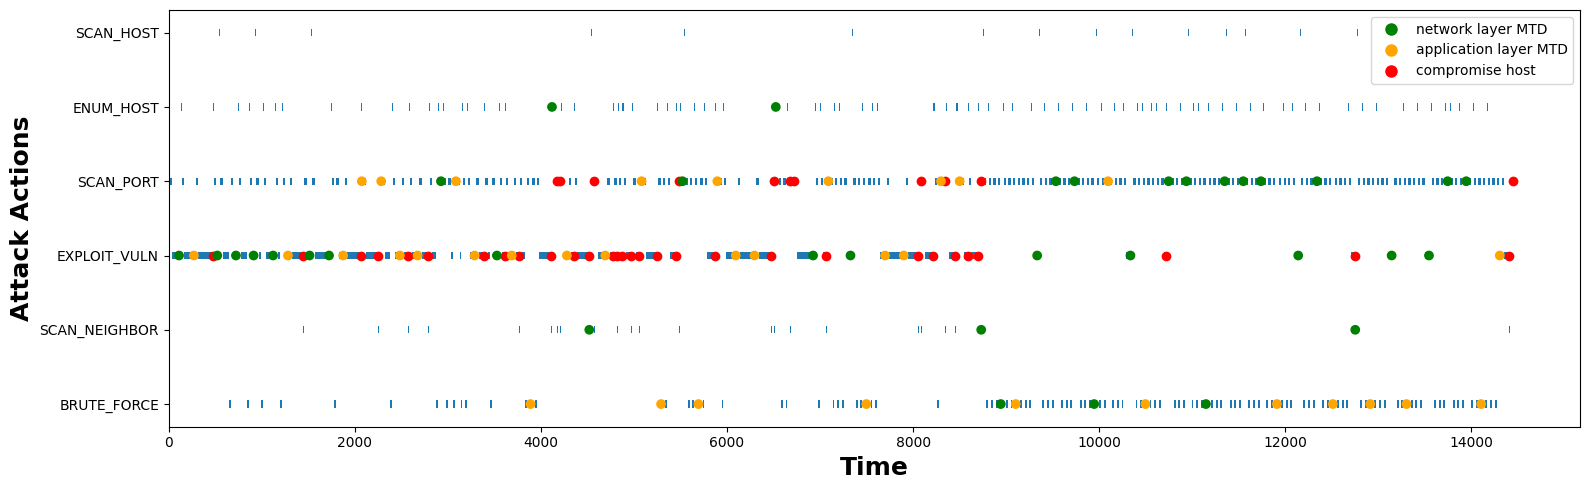

In [11]:
for i in range(len(features)):
    evaluation = execute_ai_simulation(start_time=0, finish_time=None, scheme='random', mtd_interval=None, custom_strategies=None,
                       checkpoints=None, total_nodes=50, total_endpoints=5, total_subnets=8, total_layers=4,
                       target_layer=4, total_database=2, terminate_compromise_ratio=0.8, new_network=False, features=[features[i]])
    evaluation.get_network().draw()
    evaluation.visualise_mtd_operation()
    evaluation.visualise_attack_operation_group_by_host()
    evaluation.visualise_attack_operation()
    evaluation.compromise_record_by_attack_action()
    evaluation.evaluation_result_by_compromise_checkpoint()

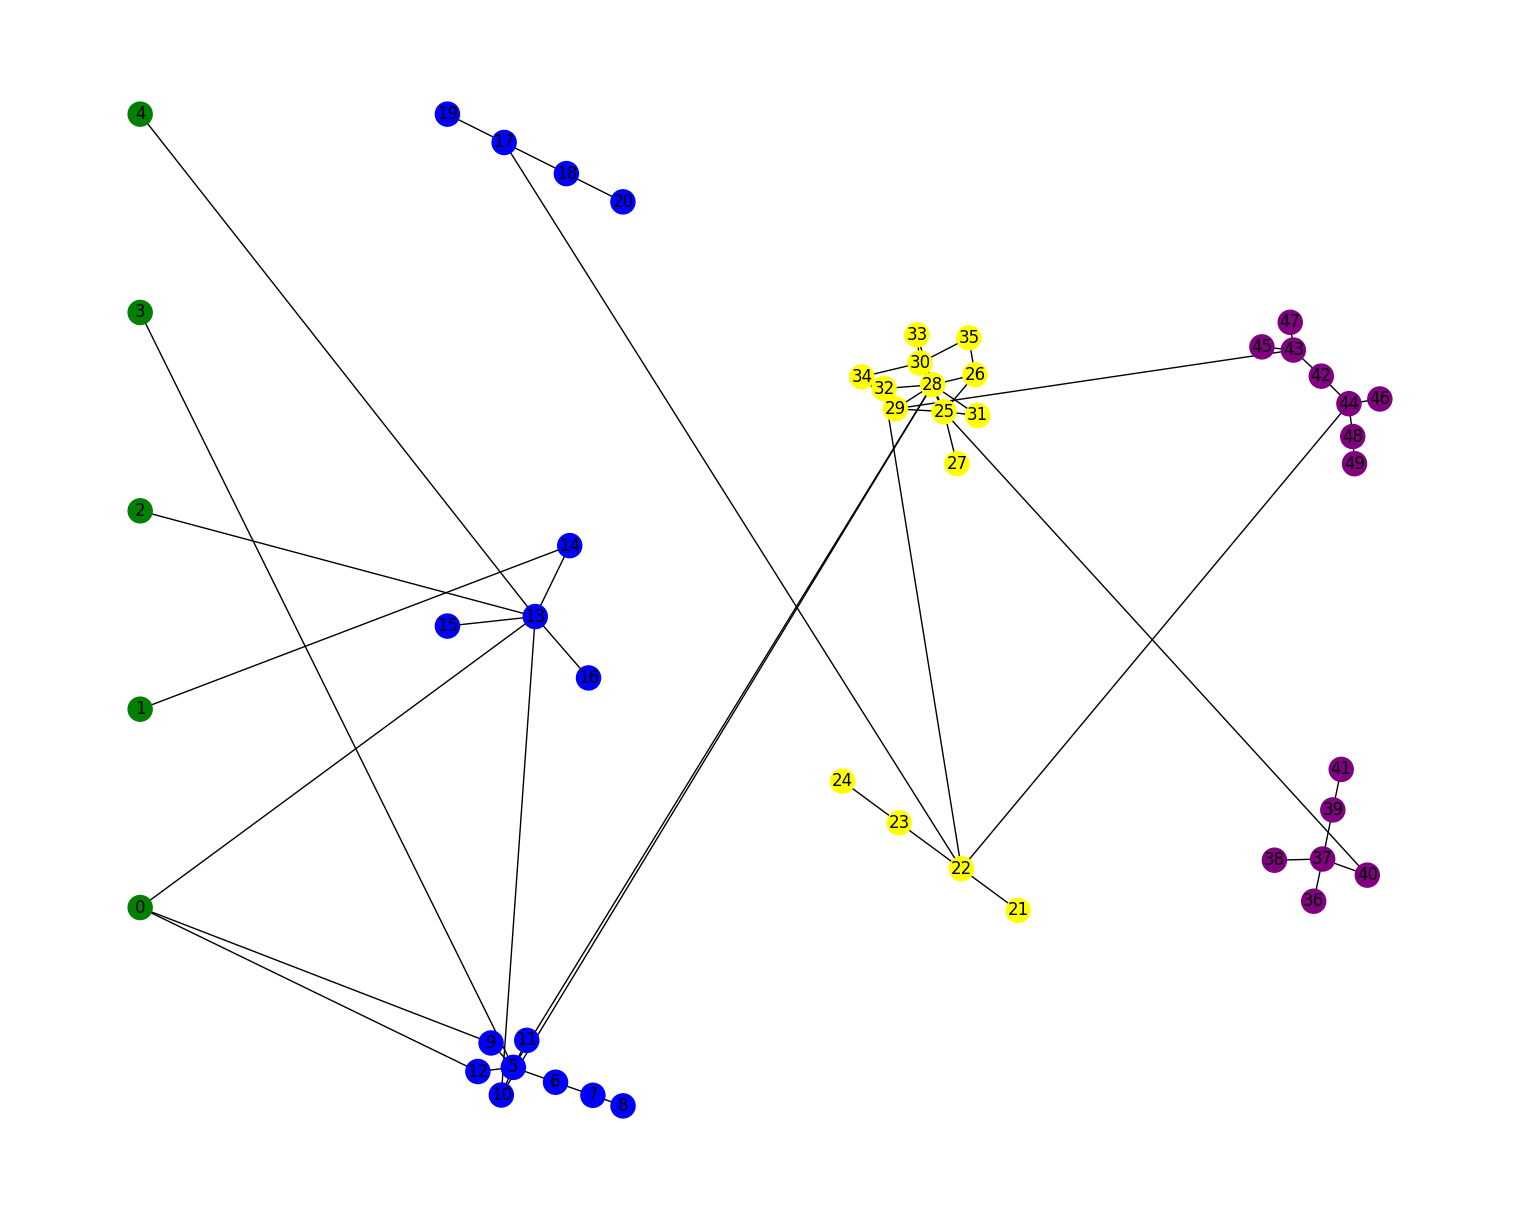

In [12]:
evaluation.get_network().draw()
plt.show()

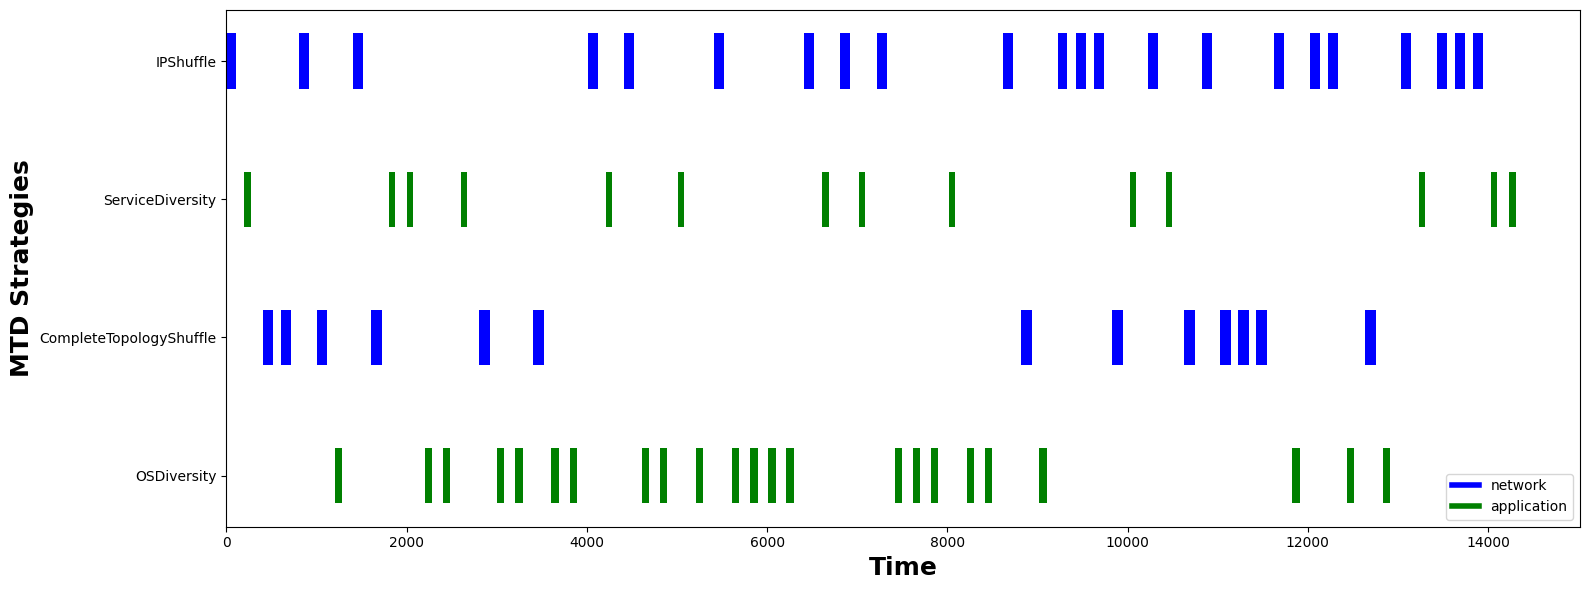

In [13]:
evaluation.visualise_mtd_operation()

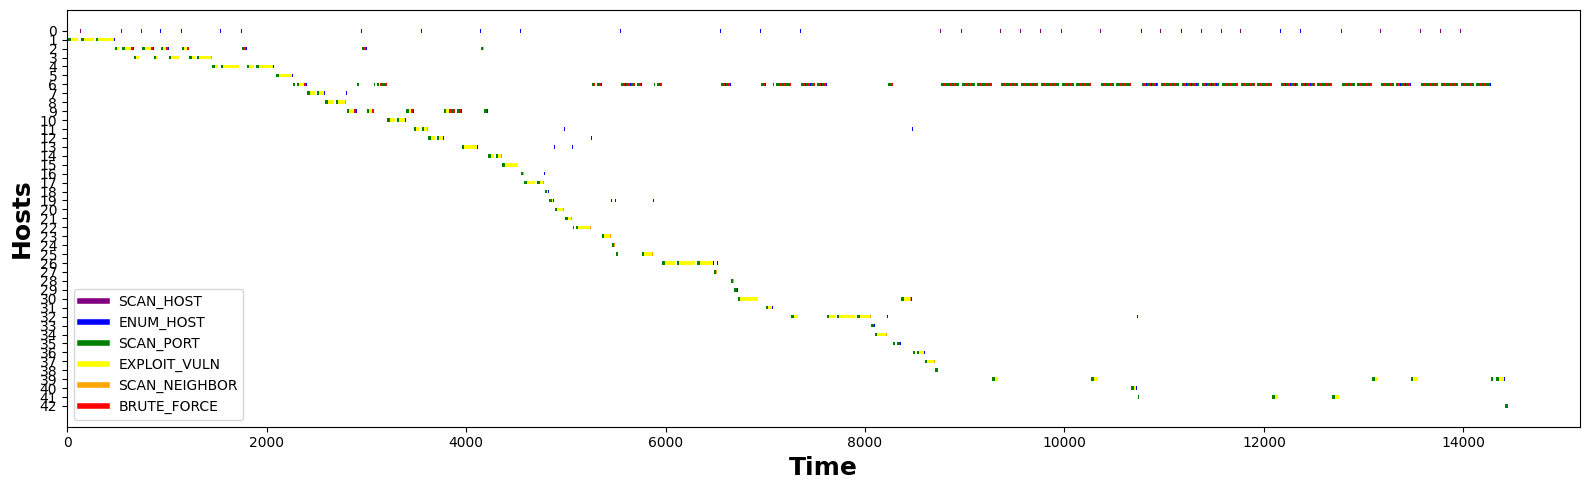

In [14]:
evaluation.visualise_attack_operation_group_by_host()

total compromised hosts:  41


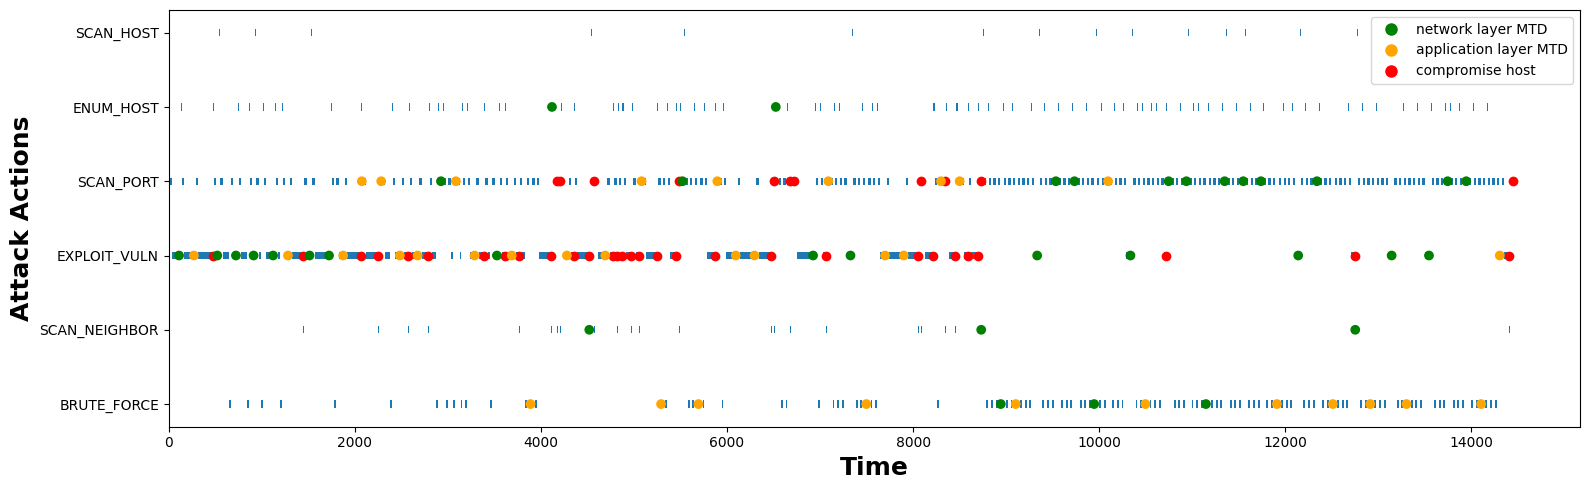

In [15]:
evaluation.visualise_attack_operation()

In [16]:
evaluation.compromise_record_by_attack_action()

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
60,EXPLOIT_VULN,466.411104,470.894136,4.483031,0,83522ce1-24dd-40ac-9c10-180d12aaf4b7,0,83522ce1-24dd-40ac-9c10-180d12aaf4b7,2,51,0,"[Reeta, Biddy, Melba, Bryna, Elke]",None,None,yellow,1
152,EXPLOIT_VULN,1446.970204,1447.989161,1.018958,1,ca6d146e-25ca-4958-8cd4-4d6e5495487f,1,ca6d146e-25ca-4958-8cd4-4d6e5495487f,4,110,1,"[Casi, Binni, Felipa]",None,None,yellow,3
208,EXPLOIT_VULN,2043.334965,2062.831772,19.496807,18,ce59a327-0128-4d4d-8b60-e092c89739dc,18,ce59a327-0128-4d4d-8b60-e092c89739dc,3,150,2,"[Halie, Lynda, Emogene, Lil]",None,None,yellow,4
233,EXPLOIT_VULN,2246.693334,2250.765979,4.072645,17,9218865b-63c2-463d-8f99-c4afbb34a6f8,17,9218865b-63c2-463d-8f99-c4afbb34a6f8,1,171,3,"[Anastasia, Roxie, Florentia, Elizabeth]",None,None,yellow,5
265,EXPLOIT_VULN,2568.480840,2575.262707,6.781867,19,e576b1de-accc-4f9f-8fbd-bad6b6cdb4f0,19,e576b1de-accc-4f9f-8fbd-bad6b6cdb4f0,1,193,4,"[Terza, Clarinda]",None,None,yellow,7
286,EXPLOIT_VULN,2780.917777,2789.904480,8.986702,20,40b26bd3-49d0-4c65-87b0-e75b1c4b3301,20,40b26bd3-49d0-4c65-87b0-e75b1c4b3301,1,208,5,"[Edi, Darsie, Cynthy, Harlie]",None,None,yellow,8
331,EXPLOIT_VULN,3383.208357,3387.713748,4.505391,2,d566ec36-4d9e-4076-8e7e-e2a11f4ff3b4,2,d566ec36-4d9e-4076-8e7e-e2a11f4ff3b4,1,228,6,[],None,None,yellow,10
350,EXPLOIT_VULN,3589.686204,3610.233916,20.547712,8,ab17a5a3-0d4c-4657-baf7-31eab4efbfa1,8,ab17a5a3-0d4c-4657-baf7-31eab4efbfa1,2,236,7,"[Louise, Coriss, Dulcinea]",None,None,yellow,11
369,EXPLOIT_VULN,3756.083802,3765.376516,9.292714,24,b5d42dc1-8ff5-480d-8107-4d18943fa7d7,24,b5d42dc1-8ff5-480d-8107-4d18943fa7d7,1,250,8,"[Conny, Ardelis]",None,None,yellow,12
399,EXPLOIT_VULN,4097.684024,4108.672996,10.988972,10,63c3be04-7dbb-46a9-9129-e71fd24a74d7,10,63c3be04-7dbb-46a9-9129-e71fd24a74d7,1,269,9,"[Lucretia, Jacquetta]",None,None,yellow,13


In [17]:
evaluation.compromise_record_by_attack_action('SCAN_PORT')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
405,SCAN_PORT,4149.174346,4174.174346,25.0,22,496ab793-6d96-406e-a869-120c7549ffa1,22,496ab793-6d96-406e-a869-120c7549ffa1,8,270,10,"[Linnet, Kara]",None,None,green,2
408,SCAN_PORT,4184.174346,4209.174346,25.0,21,c14c5a6c-deac-4af6-93b4-c08bd3792b8b,21,c14c5a6c-deac-4af6-93b4-c08bd3792b8b,6,270,11,"[Carolee, Katie, Mareah]",None,None,green,9
448,SCAN_PORT,4550.231665,4575.231665,25.0,15,ef89b5d6-1e39-4b88-bf07-29f5c7ac9ae6,15,ef89b5d6-1e39-4b88-bf07-29f5c7ac9ae6,1,297,14,[Sigrid],None,None,green,16
549,SCAN_PORT,5462.428895,5487.428895,25.0,31,8494fb12-95ce-403e-9fd0-d3a710ddfcc3,31,8494fb12-95ce-403e-9fd0-d3a710ddfcc3,1,357,22,[Daveta],None,None,green,24
642,SCAN_PORT,6484.532764,6509.532764,25.0,32,615cb1ea-0055-4e3b-b108-5d0e8392f7f6,32,615cb1ea-0055-4e3b-b108-5d0e8392f7f6,1,417,25,[Fernandina],None,None,green,27
654,SCAN_PORT,6654.670952,6679.670952,25.0,5,fe4ad62d-077d-4f0f-92c5-ba6ed6719d28,5,fe4ad62d-077d-4f0f-92c5-ba6ed6719d28,1,417,26,[],None,None,green,28
657,SCAN_PORT,6689.670952,6714.670952,25.0,11,681665e1-e69f-4b65-bb8a-f3c81da2b456,11,681665e1-e69f-4b65-bb8a-f3c81da2b456,1,417,27,[Elita],None,None,green,29
777,SCAN_PORT,8064.091486,8089.091486,25.0,44,a6366179-a562-4f29-a913-88bd163b79bf,44,a6366179-a562-4f29-a913-88bd163b79bf,1,488,30,[],None,None,green,33
802,SCAN_PORT,8321.249977,8346.249977,25.0,6,61782662-2418-4f44-b2ac-350147e127f0,6,61782662-2418-4f44-b2ac-350147e127f0,1,501,32,[],None,None,green,35
846,SCAN_PORT,8703.883872,8728.883872,25.0,40,ee4c4c60-9477-49ee-9bca-307ac550dc0b,40,ee4c4c60-9477-49ee-9bca-307ac550dc0b,1,527,36,[],None,None,green,38


In [18]:
evaluation.compromise_record_by_attack_action('EXPLOIT_VULN')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
60,EXPLOIT_VULN,466.411104,470.894136,4.483031,0,83522ce1-24dd-40ac-9c10-180d12aaf4b7,0,83522ce1-24dd-40ac-9c10-180d12aaf4b7,2,51,0,"[Reeta, Biddy, Melba, Bryna, Elke]",None,None,yellow,1
152,EXPLOIT_VULN,1446.970204,1447.989161,1.018958,1,ca6d146e-25ca-4958-8cd4-4d6e5495487f,1,ca6d146e-25ca-4958-8cd4-4d6e5495487f,4,110,1,"[Casi, Binni, Felipa]",None,None,yellow,3
208,EXPLOIT_VULN,2043.334965,2062.831772,19.496807,18,ce59a327-0128-4d4d-8b60-e092c89739dc,18,ce59a327-0128-4d4d-8b60-e092c89739dc,3,150,2,"[Halie, Lynda, Emogene, Lil]",None,None,yellow,4
233,EXPLOIT_VULN,2246.693334,2250.765979,4.072645,17,9218865b-63c2-463d-8f99-c4afbb34a6f8,17,9218865b-63c2-463d-8f99-c4afbb34a6f8,1,171,3,"[Anastasia, Roxie, Florentia, Elizabeth]",None,None,yellow,5
265,EXPLOIT_VULN,2568.480840,2575.262707,6.781867,19,e576b1de-accc-4f9f-8fbd-bad6b6cdb4f0,19,e576b1de-accc-4f9f-8fbd-bad6b6cdb4f0,1,193,4,"[Terza, Clarinda]",None,None,yellow,7
286,EXPLOIT_VULN,2780.917777,2789.904480,8.986702,20,40b26bd3-49d0-4c65-87b0-e75b1c4b3301,20,40b26bd3-49d0-4c65-87b0-e75b1c4b3301,1,208,5,"[Edi, Darsie, Cynthy, Harlie]",None,None,yellow,8
331,EXPLOIT_VULN,3383.208357,3387.713748,4.505391,2,d566ec36-4d9e-4076-8e7e-e2a11f4ff3b4,2,d566ec36-4d9e-4076-8e7e-e2a11f4ff3b4,1,228,6,[],None,None,yellow,10
350,EXPLOIT_VULN,3589.686204,3610.233916,20.547712,8,ab17a5a3-0d4c-4657-baf7-31eab4efbfa1,8,ab17a5a3-0d4c-4657-baf7-31eab4efbfa1,2,236,7,"[Louise, Coriss, Dulcinea]",None,None,yellow,11
369,EXPLOIT_VULN,3756.083802,3765.376516,9.292714,24,b5d42dc1-8ff5-480d-8107-4d18943fa7d7,24,b5d42dc1-8ff5-480d-8107-4d18943fa7d7,1,250,8,"[Conny, Ardelis]",None,None,yellow,12
399,EXPLOIT_VULN,4097.684024,4108.672996,10.988972,10,63c3be04-7dbb-46a9-9129-e71fd24a74d7,10,63c3be04-7dbb-46a9-9129-e71fd24a74d7,1,269,9,"[Lucretia, Jacquetta]",None,None,yellow,13


In [19]:
evaluation.compromise_record_by_attack_action('BRUTE_FORCE')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token


In [20]:
evaluation.evaluation_result_by_compromise_checkpoint()

[{'time_to_compromise': 2335.4791610110015,
  'attack_success_rate': 0.19230769230769232,
  'host_compromise_ratio': 0.1,
  'mtd_execution_frequency': 0.005032860486769052},
 {'time_to_compromise': 3446.572552528254,
  'attack_success_rate': 0.2222222222222222,
  'host_compromise_ratio': 0.2,
  'mtd_execution_frequency': 0.005032860486769052},
 {'time_to_compromise': 3927.9976011760145,
  'attack_success_rate': 0.28846153846153844,
  'host_compromise_ratio': 0.3,
  'mtd_execution_frequency': 0.005032860486769052},
 {'time_to_compromise': 4296.672065114881,
  'attack_success_rate': 0.3448275862068966,
  'host_compromise_ratio': 0.4,
  'mtd_execution_frequency': 0.005032860486769052},
 {'time_to_compromise': 5331.7755747851825,
  'attack_success_rate': 0.33783783783783783,
  'host_compromise_ratio': 0.5,
  'mtd_execution_frequency': 0.005032860486769052},
 {'time_to_compromise': 6628.304466583457,
  'attack_success_rate': 0.3157894736842105,
  'host_compromise_ratio': 0.6,
  'mtd_executi